In [758]:
import pandas as pd
import numpy as np
import seaborn as sns
 
from matplotlib import pyplot as plt

In [759]:
data = pd.read_csv('train.csv') 
data.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [760]:
df = data[['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'price_doc']]

In [761]:
df.head()
#Y = data['price_doc']

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6.407578e+06,...,4.308127,10.814172,1.676258,0.485841,6.715026,0.884350,0.648488,0.637189,0.177975,5850000
1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,9.589337e+06,...,0.725560,6.910568,3.424716,0.668364,1.852560,0.686252,0.519311,0.688796,0.273345,6000000
2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.808270e+06,...,3.562188,5.752368,1.375443,0.733101,0.841254,1.510089,1.486533,1.543049,0.158072,5700000
3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.258354e+07,...,0.583025,27.892717,0.811275,0.623484,10.903161,0.622272,0.599914,0.934273,0.236455,13100000
4,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.398461e+06,...,2.609420,9.155057,1.969738,0.220288,0.991683,0.892668,0.429052,0.077901,0.376838,16331452


In [762]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            30471 non-null  int64  
 1   life_sq                            24088 non-null  float64
 2   floor                              30304 non-null  float64
 3   max_floor                          20899 non-null  float64
 4   material                           20899 non-null  float64
 5   build_year                         16866 non-null  float64
 6   num_room                           20899 non-null  float64
 7   kitch_sq                           20899 non-null  float64
 8   state                              16912 non-null  float64
 9   area_m                             30471 non-null  float64
 10  raion_popul                        30471 non-null  int64  
 11  green_zone_part                    30471 non-null  flo

In [763]:
df.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,...,4.931418,13.283916,3.958882,1.154586,6.855891,3.926702,1.505808,2.010973,1.345235,7.123035e+06
std,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,...,4.804238,8.497170,3.447536,1.541425,6.731484,4.907562,2.253759,2.306446,3.053600,4.780111e+06
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,...,0.000000,0.661366,0.003847,0.000000,0.000313,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,7.307411e+06,...,2.057437,7.529625,1.543631,0.361170,2.201193,1.016728,0.483758,0.555231,0.285124,4.740002e+06
50%,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,1.050803e+07,...,3.972224,11.910442,2.927417,0.656267,4.337579,2.031685,0.839647,1.052999,0.493048,6.274411e+06
75%,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,1.803644e+07,...,5.551858,16.560167,5.485423,1.333994,9.380269,5.415663,1.549517,3.046687,0.936324,8.300000e+06
max,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,2.060718e+08,...,54.080913,59.501648,41.103651,26.652505,84.862148,55.278225,26.259543,18.958933,47.394706,1.111111e+08


In [764]:
dat = df.copy()
dat = dat.fillna(0)

In [765]:
#dat2 = data[['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
#'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'ID_metro', 'metro_min_walk', 'price_doc']]

In [766]:
#sns.pairplot(dat2)

<AxesSubplot:>

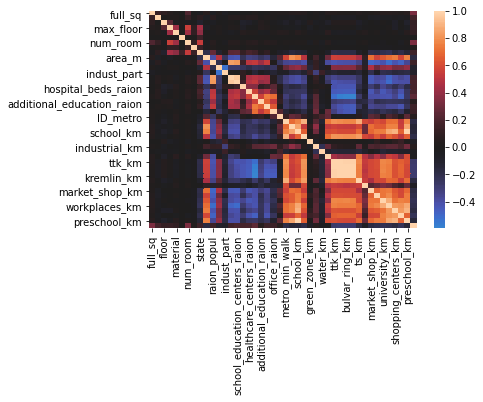

In [767]:
cor = dat.corr()
sns.heatmap(cor, center=0)

In [768]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from tqdm.notebook import trange, tqdm

In [769]:
costs_mse_train = []
costs_r2_train = []
costs_mse_test = []
costs_r2_test = []

In [770]:
X = dat[dat.columns[:-1]]
Y = dat['price_doc']

In [771]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [772]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [773]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3834622.6752891922

In [774]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [775]:
r2_score(Y_train, y_train_predict)

0.35128335629186025

In [776]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [777]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3792869.5851347735

In [778]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [779]:
r2_score(Y_test, y_test_predict)

0.3898139423826845

In [780]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([3.0447e+04, 1.7000e+01, 5.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0.  ,  213.04,  426.08,  639.12,  852.16, 1065.2 , 1278.24,
        1491.28, 1704.32, 1917.36, 2130.4 , 2343.44, 2556.48, 2769.52,
        2982.56, 3195.6 , 3408.64, 3621.68, 3834.72, 4047.76, 4260.8 ,
        4473.84, 4686.88, 4899.92, 5112.96, 5326.  ]),
 <BarContainer object of 25 artists>)

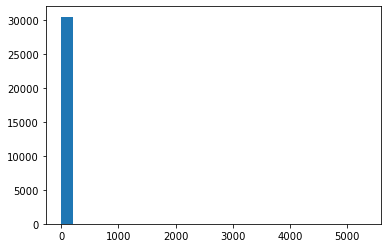

In [781]:
plt.hist(df['full_sq'], bins=25)
#X_hist['proanthocyanins'].hist(bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='full_sq'>

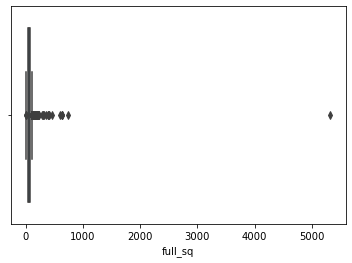

In [782]:
sns.boxplot(df['full_sq'])

In [783]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(df[['full_sq']]) # обучение
X['anomaly_full_sq']=clf.predict(df[['full_sq']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,anomaly_full_sq
0,43,27.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,6.407578e+06,...,4.308127,10.814172,1.676258,0.485841,6.715026,0.884350,0.648488,0.637189,0.177975,1
1,34,19.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,9.589337e+06,...,0.725560,6.910568,3.424716,0.668364,1.852560,0.686252,0.519311,0.688796,0.273345,1
2,43,29.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.808270e+06,...,3.562188,5.752368,1.375443,0.733101,0.841254,1.510089,1.486533,1.543049,0.158072,1
3,89,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.258354e+07,...,0.583025,27.892717,0.811275,0.623484,10.903161,0.622272,0.599914,0.934273,0.236455,1
4,77,77.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,8.398461e+06,...,2.609420,9.155057,1.969738,0.220288,0.991683,0.892668,0.429052,0.077901,0.376838,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,1.005305e+07,...,1.833401,8.820934,0.812253,0.063432,2.236806,1.442576,0.325885,1.103579,0.349899,1
30467,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,7.307411e+06,...,3.215552,12.102735,1.825643,0.398831,0.672662,0.796851,0.540003,0.069986,0.362681,1
30468,45,0.0,10.0,20.0,1.0,0.0,1.0,1.0,1.0,2.553630e+07,...,3.729416,15.546028,6.433794,1.519553,12.893684,9.479093,1.806570,4.338453,1.234235,1
30469,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,6.050065e+06,...,3.781523,2.515959,2.711199,0.412813,1.982450,2.340429,1.108672,1.204798,0.130667,1


In [784]:
anomaly=X.loc[X['anomaly_full_sq']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'full_sq'] = data['full_sq'].median()
print(anomaly['full_sq'])

6         25
37        27
79       133
104       26
128      325
        ... 
30355    133
30369    124
30397    109
30440     99
30441    113
Name: full_sq, Length: 1522, dtype: int64


In [785]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [786]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [787]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3456780.892815634

In [788]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [789]:
r2_score(Y_train, y_train_predict)

0.45559489781816687

In [790]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [791]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3837099.1869992525

In [792]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [793]:
r2_score(Y_test, y_test_predict)

0.44323239760858313

In [794]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

In [795]:
pr = 'life_sq'
ind = df[df[pr].isna()].index
X.loc[ind, pr] = df[pr].median()
cols = ['full_sq', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq'] 
rf = RandomForestRegressor(max_depth=10).fit(X[cols], X[pr])
X.loc[ind, pr] = rf.predict(X.loc[ind, cols])
X['isna_life_sq'] = 0
X.loc[ind, 'isna_life_sq'] = 1

In [796]:
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,anomaly_full_sq,isna_life_sq
0,43,27.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,6.407578e+06,...,10.814172,1.676258,0.485841,6.715026,0.884350,0.648488,0.637189,0.177975,1,0
1,34,19.000000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,9.589337e+06,...,6.910568,3.424716,0.668364,1.852560,0.686252,0.519311,0.688796,0.273345,1,0
2,43,29.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.808270e+06,...,5.752368,1.375443,0.733101,0.841254,1.510089,1.486533,1.543049,0.158072,1,0
3,89,50.000000,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.258354e+07,...,27.892717,0.811275,0.623484,10.903161,0.622272,0.599914,0.934273,0.236455,1,0
4,77,77.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,8.398461e+06,...,9.155057,1.969738,0.220288,0.991683,0.892668,0.429052,0.077901,0.376838,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,1.005305e+07,...,8.820934,0.812253,0.063432,2.236806,1.442576,0.325885,1.103579,0.349899,1,0
30467,86,59.000000,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,7.307411e+06,...,12.102735,1.825643,0.398831,0.672662,0.796851,0.540003,0.069986,0.362681,1,0
30468,45,31.747391,10.0,20.0,1.0,0.0,1.0,1.0,1.0,2.553630e+07,...,15.546028,6.433794,1.519553,12.893684,9.479093,1.806570,4.338453,1.234235,1,1
30469,64,32.000000,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,6.050065e+06,...,2.515959,2.711199,0.412813,1.982450,2.340429,1.108672,1.204798,0.130667,1,0


(array([3.0458e+04, 1.0000e+01, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0.  ,  299.12,  598.24,  897.36, 1196.48, 1495.6 , 1794.72,
        2093.84, 2392.96, 2692.08, 2991.2 , 3290.32, 3589.44, 3888.56,
        4187.68, 4486.8 , 4785.92, 5085.04, 5384.16, 5683.28, 5982.4 ,
        6281.52, 6580.64, 6879.76, 7178.88, 7478.  ]),
 <BarContainer object of 25 artists>)

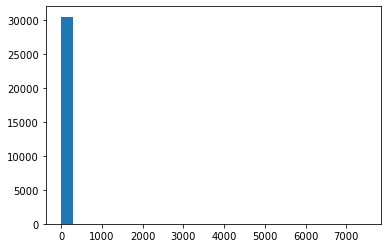

In [797]:
plt.hist(X['life_sq'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='life_sq'>

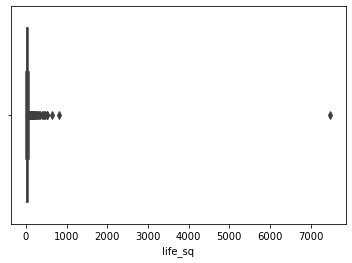

In [798]:
sns.boxplot(X['life_sq'])

In [799]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['life_sq']]) # обучение
X['anomaly_life_sq']=clf.predict(X[['life_sq']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,anomaly_full_sq,isna_life_sq,anomaly_life_sq
0,43,27.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,6.407578e+06,...,1.676258,0.485841,6.715026,0.884350,0.648488,0.637189,0.177975,1,0,1
1,34,19.000000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,9.589337e+06,...,3.424716,0.668364,1.852560,0.686252,0.519311,0.688796,0.273345,1,0,1
2,43,29.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.808270e+06,...,1.375443,0.733101,0.841254,1.510089,1.486533,1.543049,0.158072,1,0,1
3,89,50.000000,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.258354e+07,...,0.811275,0.623484,10.903161,0.622272,0.599914,0.934273,0.236455,1,0,1
4,77,77.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,8.398461e+06,...,1.969738,0.220288,0.991683,0.892668,0.429052,0.077901,0.376838,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,1.005305e+07,...,0.812253,0.063432,2.236806,1.442576,0.325885,1.103579,0.349899,1,0,1
30467,86,59.000000,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,7.307411e+06,...,1.825643,0.398831,0.672662,0.796851,0.540003,0.069986,0.362681,1,0,1
30468,45,31.747391,10.0,20.0,1.0,0.0,1.0,1.0,1.0,2.553630e+07,...,6.433794,1.519553,12.893684,9.479093,1.806570,4.338453,1.234235,1,1,1
30469,64,32.000000,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,6.050065e+06,...,2.711199,0.412813,1.982450,2.340429,1.108672,1.204798,0.130667,1,0,1


In [800]:
anomaly=X.loc[X['anomaly_life_sq']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'life_sq'] = data['life_sq'].median()
print(anomaly['life_sq'])

4         77.0
104        1.0
128      325.0
147      108.0
178       94.0
         ...  
30441      1.0
30446     82.0
30453      1.0
30455     79.0
30458      1.0
Name: life_sq, Length: 1494, dtype: float64


In [801]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [802]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [803]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3571014.277530717

In [804]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [805]:
r2_score(Y_train, y_train_predict)

0.45312702075780464

In [806]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [807]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3279169.129444019

In [808]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [809]:
r2_score(Y_test, y_test_predict)

0.4872255488625594

In [810]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

In [811]:
pr = 'floor'
ind = df[df[pr].isna()].index
X.loc[ind, pr] = df[pr].median()
cols = ['full_sq', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq'] 
rf = RandomForestRegressor(max_depth=10).fit(X[cols], X[pr])
X.loc[ind, pr] = rf.predict(X.loc[ind, cols])
X['isna_floor'] = 0
X.loc[ind, 'isna_floor'] = 1

In [812]:
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,anomaly_full_sq,isna_life_sq,anomaly_life_sq,isna_floor
0,43,27.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,6.407578e+06,...,0.485841,6.715026,0.884350,0.648488,0.637189,0.177975,1,0,1,0
1,34,19.000000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,9.589337e+06,...,0.668364,1.852560,0.686252,0.519311,0.688796,0.273345,1,0,1,0
2,43,29.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.808270e+06,...,0.733101,0.841254,1.510089,1.486533,1.543049,0.158072,1,0,1,0
3,89,50.000000,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.258354e+07,...,0.623484,10.903161,0.622272,0.599914,0.934273,0.236455,1,0,1,0
4,77,30.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,8.398461e+06,...,0.220288,0.991683,0.892668,0.429052,0.077901,0.376838,1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,1.005305e+07,...,0.063432,2.236806,1.442576,0.325885,1.103579,0.349899,1,0,1,0
30467,86,59.000000,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,7.307411e+06,...,0.398831,0.672662,0.796851,0.540003,0.069986,0.362681,1,0,1,0
30468,45,31.747391,10.0,20.0,1.0,0.0,1.0,1.0,1.0,2.553630e+07,...,1.519553,12.893684,9.479093,1.806570,4.338453,1.234235,1,1,1,0
30469,64,32.000000,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,6.050065e+06,...,0.412813,1.982450,2.340429,1.108672,1.204798,0.130667,1,0,1,0


(array([7.915e+03, 7.293e+03, 5.740e+03, 3.918e+03, 2.666e+03, 1.839e+03,
        5.300e+02, 3.980e+02, 1.250e+02, 1.500e+01, 2.000e+01, 5.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([ 0.  ,  3.08,  6.16,  9.24, 12.32, 15.4 , 18.48, 21.56, 24.64,
        27.72, 30.8 , 33.88, 36.96, 40.04, 43.12, 46.2 , 49.28, 52.36,
        55.44, 58.52, 61.6 , 64.68, 67.76, 70.84, 73.92, 77.  ]),
 <BarContainer object of 25 artists>)

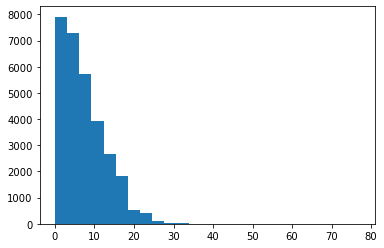

In [813]:
plt.hist(X['floor'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floor'>

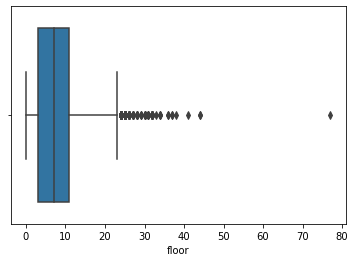

In [814]:
sns.boxplot(X['floor'])

In [815]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.04),max_features=1.0)
clf.fit(X[['floor']]) # обучение
X['anomaly_floor']=clf.predict(X[['floor']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,anomaly_full_sq,isna_life_sq,anomaly_life_sq,isna_floor,anomaly_floor
0,43,27.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,6.407578e+06,...,6.715026,0.884350,0.648488,0.637189,0.177975,1,0,1,0,1
1,34,19.000000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,9.589337e+06,...,1.852560,0.686252,0.519311,0.688796,0.273345,1,0,1,0,1
2,43,29.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.808270e+06,...,0.841254,1.510089,1.486533,1.543049,0.158072,1,0,1,0,1
3,89,50.000000,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.258354e+07,...,10.903161,0.622272,0.599914,0.934273,0.236455,1,0,1,0,1
4,77,30.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,8.398461e+06,...,0.991683,0.892668,0.429052,0.077901,0.376838,1,0,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,1.005305e+07,...,2.236806,1.442576,0.325885,1.103579,0.349899,1,0,1,0,1
30467,86,59.000000,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,7.307411e+06,...,0.672662,0.796851,0.540003,0.069986,0.362681,1,0,1,0,1
30468,45,31.747391,10.0,20.0,1.0,0.0,1.0,1.0,1.0,2.553630e+07,...,12.893684,9.479093,1.806570,4.338453,1.234235,1,1,1,0,1
30469,64,32.000000,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,6.050065e+06,...,1.982450,2.340429,1.108672,1.204798,0.130667,1,0,1,0,1


In [816]:
anomaly=X.loc[X['anomaly_floor']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'floor'] = data['floor'].median()
print(anomaly['floor'])

31       24.0
45       24.0
147      20.0
208      21.0
271      20.0
         ... 
30441    26.0
30444    20.0
30445    19.0
30462    23.0
30464    19.0
Name: floor, Length: 1100, dtype: float64


In [817]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [818]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [819]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3474348.987861096

In [820]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [821]:
r2_score(Y_train, y_train_predict)

0.45795198226383305

In [822]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [823]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3680477.6564104464

In [824]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [825]:
r2_score(Y_test, y_test_predict)

0.46160848734243587

In [826]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

In [827]:
pr = 'max_floor'
ind = df[df[pr].isna()].index
X.loc[ind, pr] = df[pr].median()
cols = ['full_sq', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq'] 
rf = RandomForestRegressor(max_depth=10).fit(X[cols], X[pr])
X.loc[ind, pr] = rf.predict(X.loc[ind, cols])
X['isna_max_floor'] = 0
X.loc[ind, 'isna_max_floor'] = 1

In [828]:
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,workplaces_km,shopping_centers_km,office_km,preschool_km,anomaly_full_sq,isna_life_sq,anomaly_life_sq,isna_floor,anomaly_floor,isna_max_floor
0,43,27.000000,4.0,11.272639,0.0,0.0,0.0,0.0,0.0,6.407578e+06,...,0.884350,0.648488,0.637189,0.177975,1,0,1,0,1,1
1,34,19.000000,3.0,11.972072,0.0,0.0,0.0,0.0,0.0,9.589337e+06,...,0.686252,0.519311,0.688796,0.273345,1,0,1,0,1,1
2,43,29.000000,2.0,9.256280,0.0,0.0,0.0,0.0,0.0,4.808270e+06,...,1.510089,1.486533,1.543049,0.158072,1,0,1,0,1,1
3,89,50.000000,9.0,14.280019,0.0,0.0,0.0,0.0,0.0,1.258354e+07,...,0.622272,0.599914,0.934273,0.236455,1,0,1,0,1,1
4,77,30.000000,4.0,10.282458,0.0,0.0,0.0,0.0,0.0,8.398461e+06,...,0.892668,0.429052,0.077901,0.376838,1,0,-1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.0,1975.0,2.0,6.0,3.0,1.005305e+07,...,1.442576,0.325885,1.103579,0.349899,1,0,1,0,1,0
30467,86,59.000000,3.0,9.000000,2.0,1935.0,4.0,10.0,3.0,7.307411e+06,...,0.796851,0.540003,0.069986,0.362681,1,0,1,0,1,0
30468,45,31.747391,10.0,20.000000,1.0,0.0,1.0,1.0,1.0,2.553630e+07,...,9.479093,1.806570,4.338453,1.234235,1,1,1,0,1,0
30469,64,32.000000,5.0,15.000000,1.0,2003.0,2.0,11.0,2.0,6.050065e+06,...,2.340429,1.108672,1.204798,0.130667,1,0,1,0,1,0


(array([2.1790e+03, 6.5170e+03, 1.1676e+04, 7.4500e+03, 1.3480e+03,
        1.1690e+03, 6.8000e+01, 1.5000e+01, 3.2000e+01, 3.0000e+00,
        9.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.  ,   4.68,   9.36,  14.04,  18.72,  23.4 ,  28.08,  32.76,
         37.44,  42.12,  46.8 ,  51.48,  56.16,  60.84,  65.52,  70.2 ,
         74.88,  79.56,  84.24,  88.92,  93.6 ,  98.28, 102.96, 107.64,
        112.32, 117.  ]),
 <BarContainer object of 25 artists>)

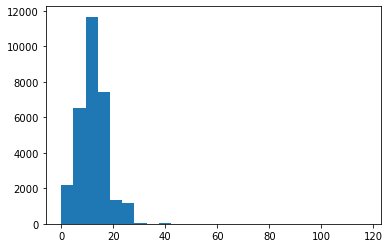

In [829]:
plt.hist(X['max_floor'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_floor'>

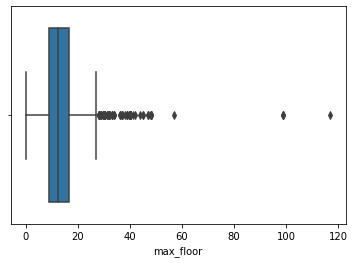

In [830]:
sns.boxplot(X['max_floor'])

In [831]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.04),max_features=1.0)
clf.fit(X[['max_floor']]) # обучение
X['anomaly_max_floor']=clf.predict(X[['max_floor']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor' ])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,shopping_centers_km,office_km,preschool_km,anomaly_full_sq,isna_life_sq,anomaly_life_sq,isna_floor,anomaly_floor,isna_max_floor,anomaly_max_floor
0,43,27.000000,4.0,11.272639,0.0,0.0,0.0,0.0,0.0,6.407578e+06,...,0.648488,0.637189,0.177975,1,0,1,0,1,1,1
1,34,19.000000,3.0,11.972072,0.0,0.0,0.0,0.0,0.0,9.589337e+06,...,0.519311,0.688796,0.273345,1,0,1,0,1,1,1
2,43,29.000000,2.0,9.256280,0.0,0.0,0.0,0.0,0.0,4.808270e+06,...,1.486533,1.543049,0.158072,1,0,1,0,1,1,1
3,89,50.000000,9.0,14.280019,0.0,0.0,0.0,0.0,0.0,1.258354e+07,...,0.599914,0.934273,0.236455,1,0,1,0,1,1,1
4,77,30.000000,4.0,10.282458,0.0,0.0,0.0,0.0,0.0,8.398461e+06,...,0.429052,0.077901,0.376838,1,0,-1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.0,1975.0,2.0,6.0,3.0,1.005305e+07,...,0.325885,1.103579,0.349899,1,0,1,0,1,0,1
30467,86,59.000000,3.0,9.000000,2.0,1935.0,4.0,10.0,3.0,7.307411e+06,...,0.540003,0.069986,0.362681,1,0,1,0,1,0,1
30468,45,31.747391,10.0,20.000000,1.0,0.0,1.0,1.0,1.0,2.553630e+07,...,1.806570,4.338453,1.234235,1,1,1,0,1,0,1
30469,64,32.000000,5.0,15.000000,1.0,2003.0,2.0,11.0,2.0,6.050065e+06,...,1.108672,1.204798,0.130667,1,0,1,0,1,0,1


In [832]:
anomaly=X.loc[X['anomaly_max_floor']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'max_floor'] = data['max_floor'].median()
print(anomaly['max_floor'])

8216      0.0
8499      0.0
8531      0.0
8912      0.0
9113     30.0
         ... 
30426     0.0
30439     0.0
30450     0.0
30451     3.0
30455     3.0
Name: max_floor, Length: 1087, dtype: float64


In [833]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [834]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [835]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3533125.7557420745

In [836]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [837]:
r2_score(Y_train, y_train_predict)

0.45484285659300694

In [838]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [839]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3363122.231479407

In [840]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [841]:
r2_score(Y_test, y_test_predict)

0.500665810245664

In [842]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

In [843]:
pr = 'material'
ind = df[df[pr].isna()].index
X.loc[ind, pr] = df[pr].median()
cols = ['full_sq', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km'] 
rf = RandomForestRegressor(max_depth=10).fit(X[cols], X[pr])
X.loc[ind, pr] = rf.predict(X.loc[ind, cols])
X['isna_material'] = 0
X.loc[ind, 'isna_material'] = 1

In [844]:
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,office_km,preschool_km,anomaly_full_sq,isna_life_sq,anomaly_life_sq,isna_floor,anomaly_floor,isna_max_floor,anomaly_max_floor,isna_material
0,43,27.000000,4.0,11.272639,1.179172,0.0,0.0,0.0,0.0,6.407578e+06,...,0.637189,0.177975,1,0,1,0,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,0.0,0.0,0.0,0.0,9.589337e+06,...,0.688796,0.273345,1,0,1,0,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,0.0,0.0,0.0,0.0,4.808270e+06,...,1.543049,0.158072,1,0,1,0,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,0.0,0.0,0.0,0.0,1.258354e+07,...,0.934273,0.236455,1,0,1,0,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,0.0,0.0,0.0,0.0,8.398461e+06,...,0.077901,0.376838,1,0,-1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.0,2.0,6.0,3.0,1.005305e+07,...,1.103579,0.349899,1,0,1,0,1,0,1,0
30467,86,59.000000,3.0,9.000000,2.000000,1935.0,4.0,10.0,3.0,7.307411e+06,...,0.069986,0.362681,1,0,1,0,1,0,1,0
30468,45,31.747391,10.0,20.000000,1.000000,0.0,1.0,1.0,1.0,2.553630e+07,...,4.338453,1.234235,1,1,1,0,1,0,1,0
30469,64,32.000000,5.0,15.000000,1.000000,2003.0,2.0,11.0,2.0,6.050065e+06,...,1.204798,0.130667,1,0,1,0,1,0,1,0


(array([1.6262e+04, 2.6070e+03, 1.8750e+03, 1.7500e+03, 9.4100e+02,
        3.1760e+03, 6.4000e+01, 3.9000e+01, 1.5000e+01, 2.2000e+01,
        9.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.3440e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.5610e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.0300e+02]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6, 5.8, 6. ]),
 <BarContainer object of 25 artists>)

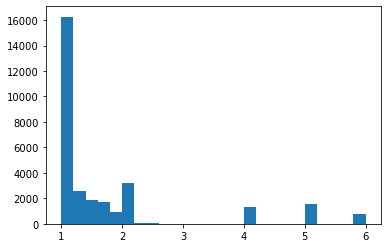

In [845]:
plt.hist(X['material'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='material'>

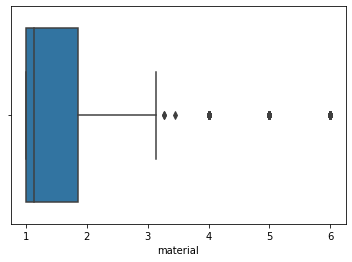

In [846]:
sns.boxplot(X['material'])

In [847]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [848]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [849]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3565633.8505527326

In [850]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [851]:
r2_score(Y_train, y_train_predict)

0.45806366846212143

In [852]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [853]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3222347.6023845216

In [854]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [855]:
r2_score(Y_test, y_test_predict)

0.4911063864278312

In [856]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

In [857]:
pr = 'build_year'
ind = df[df[pr].isna()].index
X.loc[ind, pr] = df[pr].median()
cols = ['full_sq', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq'] 
rf = RandomForestRegressor(max_depth=10).fit(X[cols], X[pr])
X.loc[ind, pr] = rf.predict(X.loc[ind, cols])
X['isna_build_year'] = 0
X.loc[ind, 'isna_build_year'] = 1

In [858]:
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,preschool_km,anomaly_full_sq,isna_life_sq,anomaly_life_sq,isna_floor,anomaly_floor,isna_max_floor,anomaly_max_floor,isna_material,isna_build_year
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,0.0,0.0,0.0,6.407578e+06,...,0.177975,1,0,1,0,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,0.0,0.0,0.0,9.589337e+06,...,0.273345,1,0,1,0,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,0.0,0.0,0.0,4.808270e+06,...,0.158072,1,0,1,0,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,0.0,0.0,0.0,1.258354e+07,...,0.236455,1,0,1,0,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,0.0,0.0,0.0,8.398461e+06,...,0.376838,1,0,-1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.0,6.0,3.0,1.005305e+07,...,0.349899,1,0,1,0,1,0,1,0,0
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.0,10.0,3.0,7.307411e+06,...,0.362681,1,0,1,0,1,0,1,0,0
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.0,1.0,1.0,2.553630e+07,...,1.234235,1,1,1,0,1,0,1,0,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.0,11.0,2.0,6.050065e+06,...,0.130667,1,0,1,0,1,0,1,0,0


(array([3.047e+04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([       0.  ,   802080.36,  1604160.72,  2406241.08,  3208321.44,
         4010401.8 ,  4812482.16,  5614562.52,  6416642.88,  7218723.24,
         8020803.6 ,  8822883.96,  9624964.32, 10427044.68, 11229125.04,
        12031205.4 , 12833285.76, 13635366.12, 14437446.48, 15239526.84,
        16041607.2 , 16843687.56, 17645767.92, 18447848.28, 19249928.64,
        20052009.  ]),
 <BarContainer object of 25 artists>)

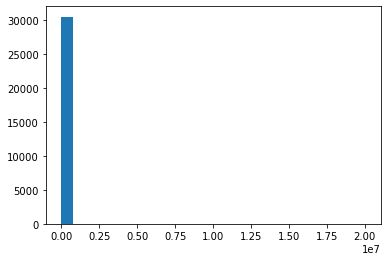

In [859]:
plt.hist(X['build_year'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='build_year'>

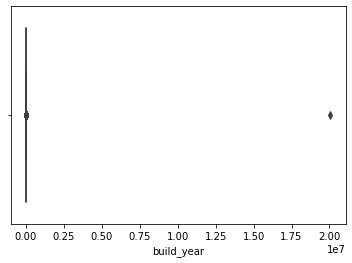

In [860]:
sns.boxplot(X['build_year'])

In [861]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
clf.fit(X[['build_year']]) # обучение
X['anomaly_build_year']=clf.predict(X[['build_year']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_full_sq,isna_life_sq,anomaly_life_sq,isna_floor,anomaly_floor,isna_max_floor,anomaly_max_floor,isna_material,isna_build_year,anomaly_build_year
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,0.0,0.0,0.0,6.407578e+06,...,1,0,1,0,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,0.0,0.0,0.0,9.589337e+06,...,1,0,1,0,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,0.0,0.0,0.0,4.808270e+06,...,1,0,1,0,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,0.0,0.0,0.0,1.258354e+07,...,1,0,1,0,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,0.0,0.0,0.0,8.398461e+06,...,1,0,-1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.0,6.0,3.0,1.005305e+07,...,1,0,1,0,1,0,1,0,0,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.0,10.0,3.0,7.307411e+06,...,1,0,1,0,1,0,1,0,0,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.0,1.0,1.0,2.553630e+07,...,1,1,1,0,1,0,1,0,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.0,11.0,2.0,6.050065e+06,...,1,0,1,0,1,0,1,0,0,1


In [862]:
anomaly=X.loc[X['anomaly_build_year']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'build_year'] = data['build_year'].median()
print(anomaly['build_year'])

313      1846.984347
512      1861.265329
637      1585.769922
676      1746.086086
1220     1733.010863
            ...     
30447    1329.570270
30451       0.000000
30455    1629.467277
30459    1491.412955
30464    2017.000000
Name: build_year, Length: 3017, dtype: float64


In [863]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [864]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [865]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3491100.8055273145

In [866]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [867]:
r2_score(Y_train, y_train_predict)

0.46465598647204376

In [868]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [869]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3505094.7461266727

In [870]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [871]:
r2_score(Y_test, y_test_predict)

0.46994951400550156

In [872]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

In [873]:
pr = 'num_room'
ind = df[df[pr].isna()].index
X.loc[ind, pr] = df[pr].median()
cols = ['full_sq', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq'] 
rf = RandomForestRegressor(max_depth=10).fit(X[cols], X[pr])
X.loc[ind, pr] = rf.predict(X.loc[ind, cols])
X['isna_num_room'] = 0
X.loc[ind, 'isna_num_room'] = 1

In [874]:
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year','isna_num_room'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,isna_life_sq,anomaly_life_sq,isna_floor,anomaly_floor,isna_max_floor,anomaly_max_floor,isna_material,isna_build_year,anomaly_build_year,isna_num_room
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,0.0,0.0,6.407578e+06,...,0,1,0,1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,0.0,0.0,9.589337e+06,...,0,1,0,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,0.0,0.0,4.808270e+06,...,0,1,0,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,0.0,0.0,1.258354e+07,...,0,1,0,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,0.0,0.0,8.398461e+06,...,0,-1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.0,3.0,1.005305e+07,...,0,1,0,1,0,1,0,0,1,0
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.0,3.0,7.307411e+06,...,0,1,0,1,0,1,0,0,1,0
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.0,1.0,2.553630e+07,...,1,1,0,1,0,1,0,1,1,0
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.0,2.0,6.050065e+06,...,0,1,0,1,0,1,0,0,1,0


(array([1.4000e+01, 9.7430e+03, 1.3729e+04, 6.4970e+03, 1.2000e+01,
        4.1800e+02, 4.0000e+01, 9.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.  ,  0.76,  1.52,  2.28,  3.04,  3.8 ,  4.56,  5.32,  6.08,
         6.84,  7.6 ,  8.36,  9.12,  9.88, 10.64, 11.4 , 12.16, 12.92,
        13.68, 14.44, 15.2 , 15.96, 16.72, 17.48, 18.24, 19.  ]),
 <BarContainer object of 25 artists>)

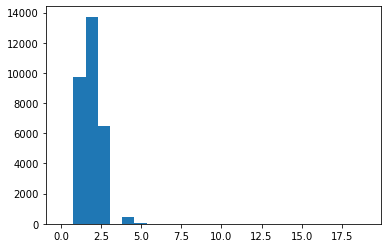

In [875]:
plt.hist(X['num_room'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_room'>

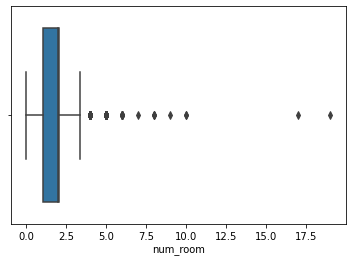

In [876]:
sns.boxplot(X['num_room'])

In [877]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.01),max_features=1.0)
clf.fit(X[['num_room']]) # обучение
X['anomaly_num_room']=clf.predict(X[['num_room']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_life_sq,isna_floor,anomaly_floor,isna_max_floor,anomaly_max_floor,isna_material,isna_build_year,anomaly_build_year,isna_num_room,anomaly_num_room
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,0.0,0.0,6.407578e+06,...,1,0,1,1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,0.0,0.0,9.589337e+06,...,1,0,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,0.0,0.0,4.808270e+06,...,1,0,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,0.0,0.0,1.258354e+07,...,1,0,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,0.0,0.0,8.398461e+06,...,-1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.0,3.0,1.005305e+07,...,1,0,1,0,1,0,0,1,0,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.0,3.0,7.307411e+06,...,1,0,1,0,1,0,0,1,0,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.0,1.0,2.553630e+07,...,1,0,1,0,1,0,1,1,0,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.0,2.0,6.050065e+06,...,1,0,1,0,1,0,0,1,0,1


In [878]:
anomaly=X.loc[X['anomaly_num_room']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'num_room'] = data['num_room'].median()
print(anomaly['num_room'])

8933      5.0
10076     6.0
10489     5.0
10929     5.0
11416     5.0
11621    19.0
12701     5.0
12704     5.0
12865     5.0
13083     5.0
13242     6.0
13271     5.0
14398     5.0
14870     5.0
14903     5.0
15145     6.0
15306     5.0
16597     5.0
16740     5.0
16743     6.0
16943     5.0
17428     5.0
17764    10.0
17841     5.0
18406     5.0
18525     5.0
18933     8.0
18990     7.0
19390     6.0
19513     5.0
20155     5.0
21697     5.0
21897     8.0
22073     5.0
22077     5.0
22665     5.0
23744     5.0
24007     6.0
24092     5.0
24145     5.0
24504     5.0
25347     5.0
25577     5.0
25745     5.0
25999     5.0
26666     5.0
26713    17.0
26882     5.0
27615     5.0
28081     6.0
28326     9.0
28622     6.0
28955     5.0
28977     5.0
29172    10.0
29247     5.0
29517     8.0
29656     6.0
Name: num_room, dtype: float64


In [879]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [880]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [881]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3421354.2599298884

In [882]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [883]:
r2_score(Y_train, y_train_predict)

0.4793292452025121

In [884]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [885]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3732360.0711082146

In [886]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [887]:
r2_score(Y_test, y_test_predict)

0.4270820642674017

In [888]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

In [889]:
pr = 'kitch_sq'
ind = df[df[pr].isna()].index
X.loc[ind, pr] = df[pr].median()
cols = ['full_sq', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq'] 
rf = RandomForestRegressor(max_depth=10).fit(X[cols], X[pr])
X.loc[ind, pr] = rf.predict(X.loc[ind, cols])
X['isna_kitch_sq'] = 0
X.loc[ind, 'isna_kitch_sq'] = 1

In [890]:
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year','isna_num_room',
'anomaly_num_room', 'isna_kitch_sq'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,isna_floor,anomaly_floor,isna_max_floor,anomaly_max_floor,isna_material,isna_build_year,anomaly_build_year,isna_num_room,anomaly_num_room,isna_kitch_sq
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,0.0,6.407578e+06,...,0,1,1,1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,0.0,9.589337e+06,...,0,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,0.0,4.808270e+06,...,0,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,0.0,1.258354e+07,...,0,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,0.0,8.398461e+06,...,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.0,1.005305e+07,...,0,1,0,1,0,0,1,0,1,0
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.0,7.307411e+06,...,0,1,0,1,0,0,1,0,1,0
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.0,2.553630e+07,...,0,1,0,1,0,1,1,0,1,0
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.0,6.050065e+06,...,0,1,0,1,0,0,1,0,1,0


(array([3.044e+04, 2.500e+01, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        4.000e+00]),
 array([   0.  ,   80.56,  161.12,  241.68,  322.24,  402.8 ,  483.36,
         563.92,  644.48,  725.04,  805.6 ,  886.16,  966.72, 1047.28,
        1127.84, 1208.4 , 1288.96, 1369.52, 1450.08, 1530.64, 1611.2 ,
        1691.76, 1772.32, 1852.88, 1933.44, 2014.  ]),
 <BarContainer object of 25 artists>)

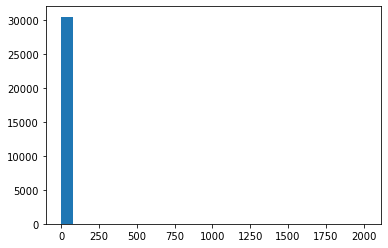

In [891]:
plt.hist(X['kitch_sq'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kitch_sq'>

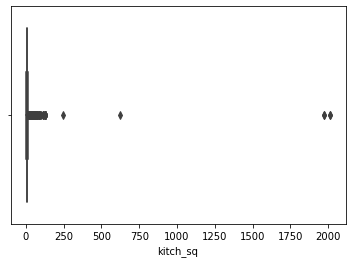

In [892]:
sns.boxplot(X['kitch_sq'])

In [893]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.02),max_features=1.0)
clf.fit(X[['kitch_sq']]) # обучение
X['anomaly_kitch_sq']=clf.predict(X[['kitch_sq']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_floor,isna_max_floor,anomaly_max_floor,isna_material,isna_build_year,anomaly_build_year,isna_num_room,anomaly_num_room,isna_kitch_sq,anomaly_kitch_sq
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,0.0,6.407578e+06,...,1,1,1,1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,0.0,9.589337e+06,...,1,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,0.0,4.808270e+06,...,1,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,0.0,1.258354e+07,...,1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,0.0,8.398461e+06,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.0,1.005305e+07,...,1,0,1,0,0,1,0,1,0,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.0,7.307411e+06,...,1,0,1,0,0,1,0,1,0,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.0,2.553630e+07,...,1,0,1,0,1,1,0,1,0,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.0,6.050065e+06,...,1,0,1,0,0,1,0,1,0,1


In [894]:
anomaly=X.loc[X['anomaly_kitch_sq']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'kitch_sq'] = data['kitch_sq'].median()
print(anomaly['kitch_sq'])

659       25.648674
1477      83.816070
3379      15.077596
3569     129.411797
3592     129.411797
            ...    
30198     14.000000
30254     14.000000
30368     20.000000
30440     14.000000
30443     79.000000
Name: kitch_sq, Length: 483, dtype: float64


In [895]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [896]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [897]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3446916.326116567

In [898]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [899]:
r2_score(Y_train, y_train_predict)

0.4736501986182714

In [900]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [901]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3471590.789152332

In [902]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [903]:
r2_score(Y_test, y_test_predict)

0.4967103605924068

In [904]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

In [905]:
pr = 'state'
ind = df[df[pr].isna()].index
X.loc[ind, pr] = df[pr].median()
cols = ['full_sq', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq'] 
rf = RandomForestRegressor(max_depth=10).fit(X[cols], X[pr])
X.loc[ind, pr] = rf.predict(X.loc[ind, cols])
X['isna_state'] = 0
X.loc[ind, 'isna_state'] = 1

In [906]:
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year','isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,isna_max_floor,anomaly_max_floor,isna_material,isna_build_year,anomaly_build_year,isna_num_room,anomaly_num_room,isna_kitch_sq,anomaly_kitch_sq,isna_state
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.411043,1.258354e+07,...,1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,0,1,0,0,1,0,1,0,1,0
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,0,1,0,0,1,0,1,0,1,0
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,0,1,0,1,1,0,1,0,1,0
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,0,1,0,0,1,0,1,0,1,0


(array([2.1076e+04, 8.9720e+03, 4.2200e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1.  ,  2.28,  3.56,  4.84,  6.12,  7.4 ,  8.68,  9.96, 11.24,
        12.52, 13.8 , 15.08, 16.36, 17.64, 18.92, 20.2 , 21.48, 22.76,
        24.04, 25.32, 26.6 , 27.88, 29.16, 30.44, 31.72, 33.  ]),
 <BarContainer object of 25 artists>)

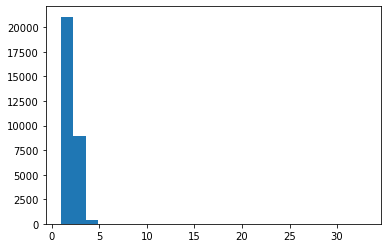

In [907]:
plt.hist(X['state'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state'>

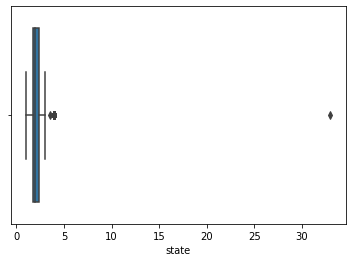

In [908]:
sns.boxplot(X['state'])

In [909]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['state']]) # обучение
X['anomaly_state']=clf.predict(X[['state']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_max_floor,isna_material,isna_build_year,anomaly_build_year,isna_num_room,anomaly_num_room,isna_kitch_sq,anomaly_kitch_sq,isna_state,anomaly_state
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.411043,1.258354e+07,...,1,1,1,1,1,1,1,1,1,-1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,0,0,1,0,1,0,1,0,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,0,0,1,0,1,0,1,0,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,0,1,1,0,1,0,1,0,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,0,0,1,0,1,0,1,0,1


In [910]:
anomaly=X.loc[X['anomaly_state']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'state'] = data['state'].median()
print(anomaly['state'])

3        2.411043
18       2.431819
36       2.430648
44       2.387221
57       2.397724
           ...   
30373    4.000000
30404    1.580732
30414    1.429526
30418    4.000000
30447    1.433095
Name: state, Length: 1512, dtype: float64


In [911]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [912]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [913]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3452641.7862645425

In [914]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [915]:
r2_score(Y_train, y_train_predict)

0.4818834202969262

In [916]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [917]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3433388.45923802

In [918]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [919]:
r2_score(Y_test, y_test_predict)

0.469255399820685

In [920]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

In [921]:
pr = 'hospital_beds_raion'
ind = df[df[pr].isna()].index
X.loc[ind, pr] = df[pr].median()
cols = ['full_sq', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq'] 
rf = RandomForestRegressor(max_depth=10).fit(X[cols], X[pr])
X.loc[ind, pr] = rf.predict(X.loc[ind, cols])
X['isna_hospital_beds_raion'] = 0
X.loc[ind, 'isna_hospital_beds_raion'] = 1

In [922]:
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year','isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,isna_material,isna_build_year,anomaly_build_year,isna_num_room,anomaly_num_room,isna_kitch_sq,anomaly_kitch_sq,isna_state,anomaly_state,isna_hospital_beds_raion
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,1,1,1,0
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,0
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,0
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,-1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,0,0,1,0,1,0,1,0,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,0,0,1,0,1,0,1,0,1,0
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,0,1,1,0,1,0,1,0,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,0,0,1,0,1,0,1,0,1,0


(array([ 2466.,  1522.,  1859.,  1458.,  1513., 15826.,   842.,   833.,
          119.,   558.,   729.,   609.,    60.,   706.,   434.,     0.,
            0.,   185.,     0.,   158.,     0.,   289.,     0.,   155.,
          150.]),
 array([   0.  ,  193.96,  387.92,  581.88,  775.84,  969.8 , 1163.76,
        1357.72, 1551.68, 1745.64, 1939.6 , 2133.56, 2327.52, 2521.48,
        2715.44, 2909.4 , 3103.36, 3297.32, 3491.28, 3685.24, 3879.2 ,
        4073.16, 4267.12, 4461.08, 4655.04, 4849.  ]),
 <BarContainer object of 25 artists>)

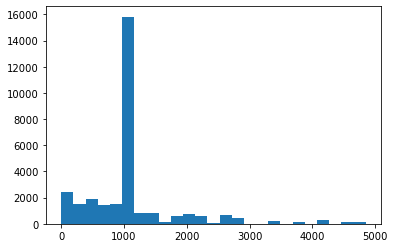

In [923]:
plt.hist(X['hospital_beds_raion'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hospital_beds_raion'>

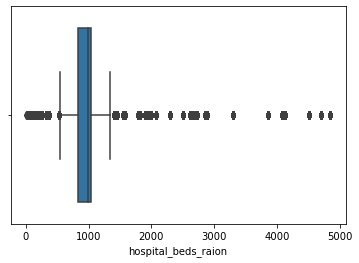

In [924]:
sns.boxplot(X['hospital_beds_raion'])

In [925]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['hospital_beds_raion']]) # обучение
X['anomaly_hospital_beds_raion']=clf.predict(X[['hospital_beds_raion']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,isna_build_year,anomaly_build_year,isna_num_room,anomaly_num_room,isna_kitch_sq,anomaly_kitch_sq,isna_state,anomaly_state,isna_hospital_beds_raion,anomaly_hospital_beds_raion
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,1,1,0,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,0,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,0,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,-1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,0,1,0,1,0,1,0,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,0,1,0,1,0,1,0,1,0,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,0,1,0,1,0,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,0,1,0,1,0,1,0,1,0,-1


In [926]:
anomaly=X.loc[X['anomaly_hospital_beds_raion']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'hospital_beds_raion'] = data['hospital_beds_raion'].median()
print(anomaly['hospital_beds_raion'])

6        4849.0
42       2729.0
46       4087.0
53       4129.0
62       2729.0
          ...  
30339    4087.0
30399    4087.0
30434    4129.0
30461    3300.0
30469    3300.0
Name: hospital_beds_raion, Length: 1452, dtype: float64


In [927]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [928]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [929]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3432801.788419322

In [930]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [931]:
r2_score(Y_train, y_train_predict)

0.4827435126856704

In [932]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [933]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3512152.628144918

In [934]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [935]:
r2_score(Y_test, y_test_predict)

0.4663608723816798

In [936]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

In [937]:
X.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,isna_build_year,anomaly_build_year,isna_num_room,anomaly_num_room,isna_kitch_sq,anomaly_kitch_sq,isna_state,anomaly_state,isna_hospital_beds_raion,anomaly_hospital_beds_raion
count,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000
mean,51.510485,33.075825,7.103169,12.674972,1.711964,1970.137546,1.908310,5.796141,2.051491,1.765705e+07,...,0.446490,0.801976,0.314135,0.996193,0.314135,0.968298,0.444980,0.900758,0.473926,0.904696
std,15.191611,12.188104,4.465082,4.974149,1.249843,35.093578,0.708576,3.109637,0.614959,2.064961e+07,...,0.497137,0.597367,0.464178,0.087175,0.464178,0.249803,0.496972,0.434328,0.499328,0.426064
min,28.000000,14.000000,0.000000,1.000000,1.000000,1810.551921,0.000000,0.000000,1.000000,2.081628e+06,...,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000
25%,39.000000,24.000000,3.000000,9.244388,1.000000,1965.000000,1.043379,4.408845,1.785305,7.307411e+06,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,49.000000,30.701728,6.500000,12.207731,1.129891,1973.423826,2.000000,6.000000,2.000000,1.050803e+07,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,61.000000,40.000000,10.000000,16.047144,1.857206,1983.000000,2.076664,8.000000,2.304444,1.803644e+07,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,96.000000,76.000000,18.000000,26.000000,6.000000,2016.000000,4.000000,13.000000,3.000000,2.060718e+08,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([1.512e+04, 7.943e+03, 3.206e+03, 5.800e+01, 1.455e+03, 6.000e+00,
        5.460e+02, 1.779e+03, 0.000e+00, 0.000e+00, 2.900e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 1.430e+02, 0.000e+00, 0.000e+00, 1.480e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 3.100e+01, 0.000e+00, 0.000e+00,
        7.000e+00]),
 array([2.08162776e+06, 1.02412350e+07, 1.84008423e+07, 2.65604495e+07,
        3.47200568e+07, 4.28796640e+07, 5.10392713e+07, 5.91988786e+07,
        6.73584858e+07, 7.55180931e+07, 8.36777003e+07, 9.18373076e+07,
        9.99969149e+07, 1.08156522e+08, 1.16316129e+08, 1.24475737e+08,
        1.32635344e+08, 1.40794951e+08, 1.48954558e+08, 1.57114166e+08,
        1.65273773e+08, 1.73433380e+08, 1.81592987e+08, 1.89752595e+08,
        1.97912202e+08, 2.06071809e+08]),
 <BarContainer object of 25 artists>)

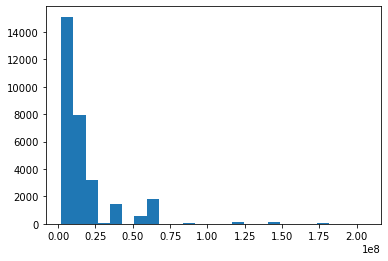

In [938]:
plt.hist(X['area_m'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_m'>

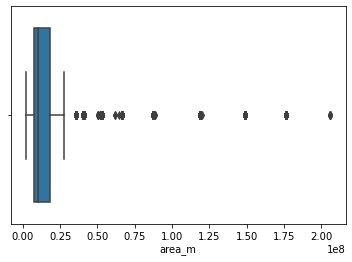

In [939]:
sns.boxplot(X['area_m'])

In [940]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['area_m']]) # обучение
X['anomaly_area_m']=clf.predict(X[['area_m']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_build_year,isna_num_room,anomaly_num_room,isna_kitch_sq,anomaly_kitch_sq,isna_state,anomaly_state,isna_hospital_beds_raion,anomaly_hospital_beds_raion,anomaly_area_m
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,1,0,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,0,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,0,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,-1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,0,1,0,1,0,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,0,1,0,1,0,1,0,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,0,1,0,1,0,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,0,1,0,1,0,1,0,-1,1


In [941]:
anomaly=X.loc[X['anomaly_area_m']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'area_m'] = data['area_m'].median()
print(anomaly['area_m'])

9        5.235177e+07
12       5.235177e+07
202      2.104405e+06
297      5.235177e+07
309      5.235177e+07
             ...     
30353    3.574795e+07
30364    5.299528e+07
30380    5.299528e+07
30398    1.186638e+08
30451    1.487016e+08
Name: area_m, Length: 1506, dtype: float64


In [942]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [943]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [944]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3467242.7741009262

In [945]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [946]:
r2_score(Y_train, y_train_predict)

0.47666062153524946

In [947]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [948]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3364772.5643679686

In [949]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [950]:
r2_score(Y_test, y_test_predict)

0.4936036433098605

In [951]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([4754., 3057.,  359., 1099.,  384.,  960.,  630., 3404., 2518.,
         846., 2515., 2197., 1480.,  736., 1153., 1328.,  559., 1720.,
           0.,    0.,    0.,    0.,  264.,    0.,  508.]),
 array([  2546.  ,  12342.92,  22139.84,  31936.76,  41733.68,  51530.6 ,
         61327.52,  71124.44,  80921.36,  90718.28, 100515.2 , 110312.12,
        120109.04, 129905.96, 139702.88, 149499.8 , 159296.72, 169093.64,
        178890.56, 188687.48, 198484.4 , 208281.32, 218078.24, 227875.16,
        237672.08, 247469.  ]),
 <BarContainer object of 25 artists>)

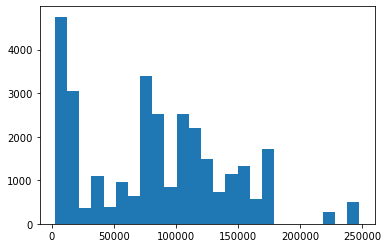

In [952]:
plt.hist(X['raion_popul'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='raion_popul'>

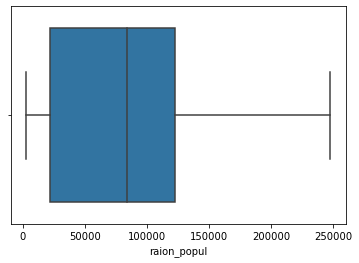

In [953]:
sns.boxplot(X['raion_popul'])

In [954]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['raion_popul']]) # обучение
X['anomaly_raion_popul']=clf.predict(X[['raion_popul']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul' ])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,isna_num_room,anomaly_num_room,isna_kitch_sq,anomaly_kitch_sq,isna_state,anomaly_state,isna_hospital_beds_raion,anomaly_hospital_beds_raion,anomaly_area_m,anomaly_raion_popul
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,0,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,0,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,0,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,-1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,0,1,0,1,0,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,0,1,0,1,0,1,0,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,0,1,0,1,0,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,0,1,0,1,0,1,0,-1,1,1


In [955]:
anomaly=X.loc[X['anomaly_raion_popul']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'raion_popul'] = data['raion_popul'].median()
print(anomaly['raion_popul'])

15       247469
35       247469
51       219609
75       219609
120      219609
          ...  
30290      2546
30316    247469
30353      2546
30371    247469
30432    247469
Name: raion_popul, Length: 1299, dtype: int64


In [956]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [957]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [958]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3413856.526160261

In [959]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [960]:
r2_score(Y_train, y_train_predict)

0.4808322890527975

In [961]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [962]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3568162.8100881753

In [963]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [964]:
r2_score(Y_test, y_test_predict)

0.4792616067010418

In [965]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([2.226e+03, 6.974e+03, 2.594e+03, 2.624e+03, 1.110e+03, 2.031e+03,
        7.260e+02, 1.573e+03, 8.210e+02, 2.576e+03, 1.734e+03, 7.620e+02,
        4.700e+02, 0.000e+00, 2.327e+03, 3.190e+02, 8.200e+02, 1.000e+00,
        3.070e+02, 1.790e+02, 2.370e+02, 0.000e+00, 2.000e+00, 0.000e+00,
        5.800e+01]),
 array([0.00187937, 0.03592111, 0.06996285, 0.10400459, 0.13804633,
        0.17208807, 0.20612981, 0.24017155, 0.27421328, 0.30825502,
        0.34229676, 0.3763385 , 0.41038024, 0.44442198, 0.47846372,
        0.51250545, 0.54654719, 0.58058893, 0.61463067, 0.64867241,
        0.68271415, 0.71675589, 0.75079763, 0.78483936, 0.8188811 ,
        0.85292284]),
 <BarContainer object of 25 artists>)

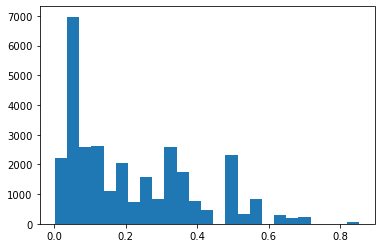

In [966]:
plt.hist(X['green_zone_part'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='green_zone_part'>

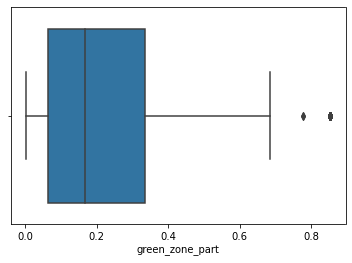

In [967]:
sns.boxplot(X['green_zone_part'])

In [968]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['green_zone_part']]) # обучение
X['anomaly_green_zone_part']=clf.predict(X[['green_zone_part']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part' ])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_num_room,isna_kitch_sq,anomaly_kitch_sq,isna_state,anomaly_state,isna_hospital_beds_raion,anomaly_hospital_beds_raion,anomaly_area_m,anomaly_raion_popul,anomaly_green_zone_part
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,0,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,0,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,0,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,-1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,0,1,0,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,0,1,0,1,0,1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,0,1,0,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,0,1,0,1,0,-1,1,1,1


In [969]:
anomaly=X.loc[X['anomaly_green_zone_part']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'green_zone_part'] = data['green_zone_part'].median()
print(anomaly['green_zone_part'])

5        0.007670
6        0.523439
61       0.637399
78       0.426396
79       0.637399
           ...   
30405    0.637399
30412    0.001879
30417    0.007670
30451    0.670840
30460    0.683844
Name: green_zone_part, Length: 1488, dtype: float64


In [970]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [971]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [972]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3415782.2593424735

In [973]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [974]:
r2_score(Y_train, y_train_predict)

0.4855991010542725

In [975]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [976]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3550330.777444118

In [977]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [978]:
r2_score(Y_test, y_test_predict)

0.4639857823194772

In [979]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([8006., 3056., 1485., 3899., 1536.,  890., 1458., 1544.,  501.,
         912., 1114., 2174.,  220.,  196., 1130.,  586.,  199.,  421.,
          26.,   49.,  602.,  174.,  101.,   77.,  115.]),
 array([0.        , 0.02087468, 0.04174936, 0.06262405, 0.08349873,
        0.10437341, 0.12524809, 0.14612278, 0.16699746, 0.18787214,
        0.20874682, 0.2296215 , 0.25049619, 0.27137087, 0.29224555,
        0.31312023, 0.33399491, 0.3548696 , 0.37574428, 0.39661896,
        0.41749364, 0.43836833, 0.45924301, 0.48011769, 0.50099237,
        0.52186705]),
 <BarContainer object of 25 artists>)

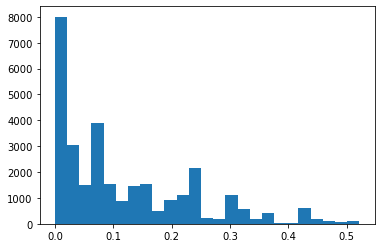

In [980]:
plt.hist(X['indust_part'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='indust_part'>

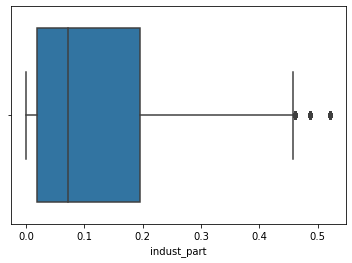

In [981]:
sns.boxplot(X['indust_part'])

In [982]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['indust_part']]) # обучение
X['anomaly_indust_part']=clf.predict(X[['indust_part']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part' ])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,isna_kitch_sq,anomaly_kitch_sq,isna_state,anomaly_state,isna_hospital_beds_raion,anomaly_hospital_beds_raion,anomaly_area_m,anomaly_raion_popul,anomaly_green_zone_part,anomaly_indust_part
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,0,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,0,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,0,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,-1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,0,1,0,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,0,1,0,1,0,1,1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,0,1,0,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,0,1,0,1,0,-1,1,1,1,1


In [983]:
anomaly=X.loc[X['anomaly_indust_part']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'indust_part'] = data['indust_part'].median()
print(anomaly['indust_part'])

5        0.486246
73       0.458174
98       0.371149
110      0.428826
115      0.458174
           ...   
30417    0.486246
30425    0.371149
30443    0.371149
30447    0.371149
30459    0.371149
Name: indust_part, Length: 1155, dtype: float64


In [984]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [985]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [986]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3403057.008302711

In [987]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [988]:
r2_score(Y_train, y_train_predict)

0.48150091380824256

In [989]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [990]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3594516.829547052

In [991]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [992]:
r2_score(Y_test, y_test_predict)

0.4811272704352073

In [993]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([6688.,  904.,    0., 1489.,    0., 1600.,    0., 5759.,    0.,
        5822.,    0., 3204.,    0., 1918.,    0.,  888.,    0.,  679.,
           0.,  561.,    0.,  451.,    0.,    0.,  508.]),
 array([ 0.  ,  0.52,  1.04,  1.56,  2.08,  2.6 ,  3.12,  3.64,  4.16,
         4.68,  5.2 ,  5.72,  6.24,  6.76,  7.28,  7.8 ,  8.32,  8.84,
         9.36,  9.88, 10.4 , 10.92, 11.44, 11.96, 12.48, 13.  ]),
 <BarContainer object of 25 artists>)

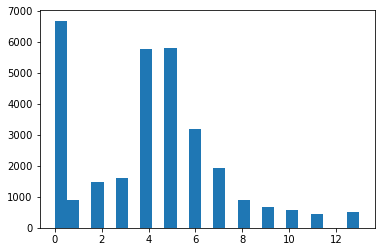

In [994]:
plt.hist(X['preschool_education_centers_raion'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='preschool_education_centers_raion'>

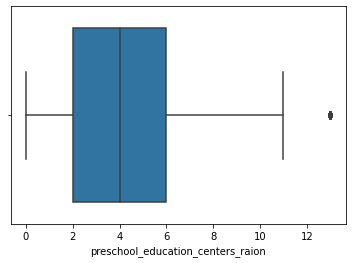

In [995]:
sns.boxplot(X['preschool_education_centers_raion'])

In [996]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['preschool_education_centers_raion']]) # обучение
X['anomaly_preschool_education_centers_raion']=clf.predict(X[['preschool_education_centers_raion']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_kitch_sq,isna_state,anomaly_state,isna_hospital_beds_raion,anomaly_hospital_beds_raion,anomaly_area_m,anomaly_raion_popul,anomaly_green_zone_part,anomaly_indust_part,anomaly_preschool_education_centers_raion
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,0,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,0,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,0,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,-1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,0,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,0,1,0,1,1,1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,0,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,0,1,0,-1,1,1,1,1,1


In [997]:
anomaly=X.loc[X['anomaly_preschool_education_centers_raion']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'preschool_education_centers_raion'] = data['preschool_education_centers_raion'].median()
print(anomaly['preschool_education_centers_raion'])

15       13
35       13
36       10
51       10
54       10
         ..
30392    11
30408    11
30409    10
30432    13
30453    11
Name: preschool_education_centers_raion, Length: 1520, dtype: int64


In [998]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [999]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1000]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3308680.4795158836

In [1001]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1002]:
r2_score(Y_train, y_train_predict)

0.4949020193496857

In [1003]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1004]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3932590.3834335026

In [1005]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1006]:
r2_score(Y_test, y_test_predict)

0.4383293546318522

In [1007]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([6685.,  492.,    0.,  847.,    0., 1795.,    0., 3324., 5747.,
           0., 3430.,    0., 2526.,    0., 2034.,    0., 1219.,  852.,
           0.,  264.,    0.,    0.,    0.,  748.,  508.]),
 array([ 0.  ,  0.56,  1.12,  1.68,  2.24,  2.8 ,  3.36,  3.92,  4.48,
         5.04,  5.6 ,  6.16,  6.72,  7.28,  7.84,  8.4 ,  8.96,  9.52,
        10.08, 10.64, 11.2 , 11.76, 12.32, 12.88, 13.44, 14.  ]),
 <BarContainer object of 25 artists>)

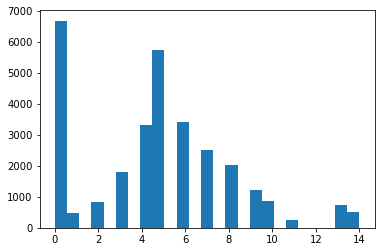

In [1008]:
plt.hist(X['school_education_centers_raion'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='school_education_centers_raion'>

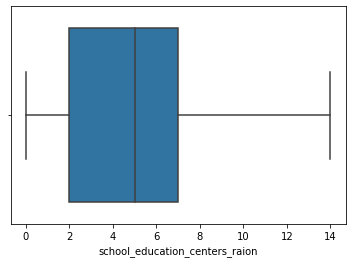

In [1009]:
sns.boxplot(X['school_education_centers_raion'])

In [1010]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['school_education_centers_raion']]) # обучение
X['anomaly_school_education_centers_raion']=clf.predict(X[['school_education_centers_raion']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,isna_state,anomaly_state,isna_hospital_beds_raion,anomaly_hospital_beds_raion,anomaly_area_m,anomaly_raion_popul,anomaly_green_zone_part,anomaly_indust_part,anomaly_preschool_education_centers_raion,anomaly_school_education_centers_raion
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,0,1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,0,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,0,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,-1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,0,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,0,1,0,1,1,1,1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,0,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,0,1,0,-1,1,1,1,1,1,1


In [1011]:
anomaly=X.loc[X['anomaly_school_education_centers_raion']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'school_education_centers_raion'] = data['school_education_centers_raion'].median()
print(anomaly['school_education_centers_raion'])

15       14
20        1
35       14
51       11
75       11
         ..
30311     1
30316    14
30337     1
30371    14
30432    14
Name: school_education_centers_raion, Length: 1264, dtype: int64


In [1012]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1013]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1014]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3405121.8556034877

In [1015]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1016]:
r2_score(Y_train, y_train_predict)

0.48676431586351354

In [1017]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1018]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3575553.1591938254

In [1019]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1020]:
r2_score(Y_test, y_test_predict)

0.4645441466670701

In [1021]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([12842.,     0.,     0.,     0.,  6604.,     0.,     0.,     0.,
         3582.,     0.,     0.,     0.,  5037.,     0.,     0.,     0.,
          960.,     0.,     0.,     0.,  1146.,     0.,     0.,     0.,
          300.]),
 array([0.  , 0.24, 0.48, 0.72, 0.96, 1.2 , 1.44, 1.68, 1.92, 2.16, 2.4 ,
        2.64, 2.88, 3.12, 3.36, 3.6 , 3.84, 4.08, 4.32, 4.56, 4.8 , 5.04,
        5.28, 5.52, 5.76, 6.  ]),
 <BarContainer object of 25 artists>)

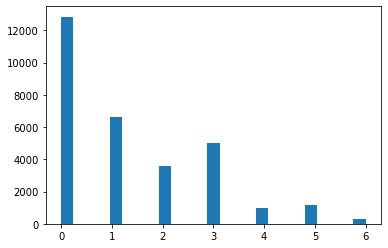

In [1022]:
plt.hist(X['healthcare_centers_raion'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='healthcare_centers_raion'>

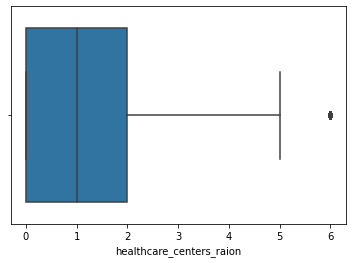

In [1023]:
sns.boxplot(X['healthcare_centers_raion'])

In [1024]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['healthcare_centers_raion']]) # обучение
X['anomaly_healthcare_centers_raion']=clf.predict(X[['healthcare_centers_raion']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_state,isna_hospital_beds_raion,anomaly_hospital_beds_raion,anomaly_area_m,anomaly_raion_popul,anomaly_green_zone_part,anomaly_indust_part,anomaly_preschool_education_centers_raion,anomaly_school_education_centers_raion,anomaly_healthcare_centers_raion
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,0,1,1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,0,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,0,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,-1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,0,1,1,1,1,1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,0,-1,1,1,1,1,1,1,1


In [1025]:
anomaly=X.loc[X['anomaly_healthcare_centers_raion']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'healthcare_centers_raion'] = data['healthcare_centers_raion'].median()
print(anomaly['healthcare_centers_raion'])

14       5
15       5
35       5
61       6
79       6
        ..
30373    5
30397    5
30403    5
30405    6
30432    5
Name: healthcare_centers_raion, Length: 1446, dtype: int64


In [1026]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1027]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1028]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3413155.8110929457

In [1029]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1030]:
r2_score(Y_train, y_train_predict)

0.49194474092094753

In [1031]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1032]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3544586.6648750007

In [1033]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1034]:
r2_score(Y_test, y_test_predict)

0.4420886740613915

In [1035]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([8135.,  635., 2861., 2668., 1678., 2403., 3269.,  352., 1419.,
        1001.,  910., 1166.,  707.,  808.,  739.,  410.,    0.,   81.,
           0.,   90.,  173.,   98.,    0.,    0.,  868.]),
 array([ 0.  ,  1.16,  2.32,  3.48,  4.64,  5.8 ,  6.96,  8.12,  9.28,
        10.44, 11.6 , 12.76, 13.92, 15.08, 16.24, 17.4 , 18.56, 19.72,
        20.88, 22.04, 23.2 , 24.36, 25.52, 26.68, 27.84, 29.  ]),
 <BarContainer object of 25 artists>)

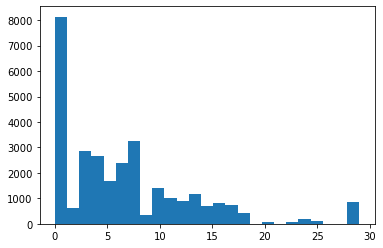

In [1036]:
plt.hist(X['sport_objects_raion'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sport_objects_raion'>

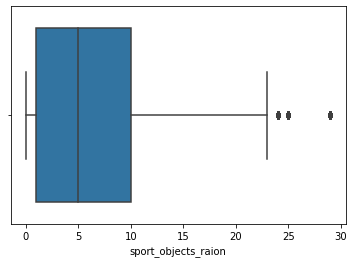

In [1037]:
sns.boxplot(X['sport_objects_raion'])

In [1038]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['sport_objects_raion']]) # обучение
X['anomaly_sport_objects_raion']=clf.predict(X[['sport_objects_raion']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,isna_hospital_beds_raion,anomaly_hospital_beds_raion,anomaly_area_m,anomaly_raion_popul,anomaly_green_zone_part,anomaly_indust_part,anomaly_preschool_education_centers_raion,anomaly_school_education_centers_raion,anomaly_healthcare_centers_raion,anomaly_sport_objects_raion
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,0,1,1,1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,0,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,0,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,0,1,1,1,1,1,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,0,1,1,1,1,1,1,1,1,-1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,0,-1,1,1,1,1,1,1,1,1


In [1039]:
anomaly=X.loc[X['anomaly_sport_objects_raion']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'sport_objects_raion'] = data['sport_objects_raion'].median()
print(anomaly['sport_objects_raion'])

4        25
13       29
72       24
83       25
95       23
         ..
30406    29
30440    25
30441    29
30465    29
30467    29
Name: sport_objects_raion, Length: 1310, dtype: int64


In [1040]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1041]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1042]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3465355.521264635

In [1043]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1044]:
r2_score(Y_train, y_train_predict)

0.47639136718785025

In [1045]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1046]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3341569.11538332

In [1047]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1048]:
r2_score(Y_test, y_test_predict)

0.5037804898740519

In [1049]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([6428., 4193.,    0., 5699., 5639.,    0., 4112., 1245.,    0.,
        1176.,  237.,    0.,  220.,    0.,    0.,   72.,    0.,  264.,
           0.,    0.,    0.,    0.,    0.,    0., 1186.]),
 array([ 0.  ,  0.64,  1.28,  1.92,  2.56,  3.2 ,  3.84,  4.48,  5.12,
         5.76,  6.4 ,  7.04,  7.68,  8.32,  8.96,  9.6 , 10.24, 10.88,
        11.52, 12.16, 12.8 , 13.44, 14.08, 14.72, 15.36, 16.  ]),
 <BarContainer object of 25 artists>)

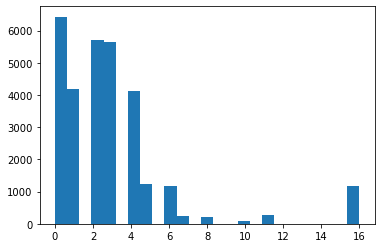

In [1050]:
plt.hist(X['additional_education_raion'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='additional_education_raion'>

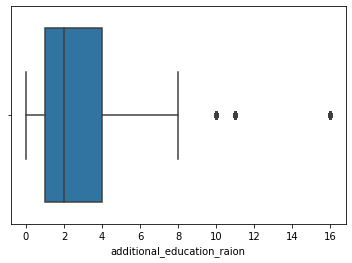

In [1051]:
sns.boxplot(X['additional_education_raion'])

In [1052]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['additional_education_raion']]) # обучение
X['anomaly_additional_education_raion']=clf.predict(X[['additional_education_raion']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_hospital_beds_raion,anomaly_area_m,anomaly_raion_popul,anomaly_green_zone_part,anomaly_indust_part,anomaly_preschool_education_centers_raion,anomaly_school_education_centers_raion,anomaly_healthcare_centers_raion,anomaly_sport_objects_raion,anomaly_additional_education_raion
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,1,1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,1,1,1,1,1,1,-1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,-1,1,1,1,1,1,1,1,1,1


In [1053]:
anomaly=X.loc[X['anomaly_additional_education_raion']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'additional_education_raion'] = data['additional_education_raion'].median()
print(anomaly['additional_education_raion'])

16        8
51       11
58       10
75       11
77        8
         ..
29979     8
30143    10
30158    10
30171     8
30240    11
Name: additional_education_raion, Length: 556, dtype: int64


In [1054]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1055]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1056]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3369336.340923137

In [1057]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1058]:
r2_score(Y_train, y_train_predict)

0.49364069282285417

In [1059]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1060]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3695261.52542009

In [1061]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1062]:
r2_score(Y_test, y_test_predict)

0.4441152432155596

In [1063]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([7471., 3615., 2827., 2198., 2487., 4171., 1542.,  888.,  743.,
         949.,  693., 1298.,    0.,    0.,    0.,    0.,  508.,  230.,
           0.,    0.,  173.,    0.,    0.,    0.,  678.]),
 array([ 0.  ,  0.92,  1.84,  2.76,  3.68,  4.6 ,  5.52,  6.44,  7.36,
         8.28,  9.2 , 10.12, 11.04, 11.96, 12.88, 13.8 , 14.72, 15.64,
        16.56, 17.48, 18.4 , 19.32, 20.24, 21.16, 22.08, 23.  ]),
 <BarContainer object of 25 artists>)

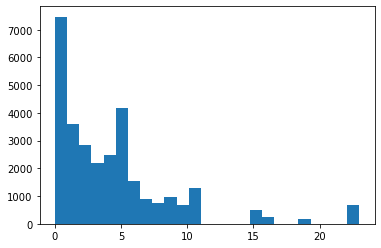

In [1064]:
plt.hist(X['shopping_centers_raion'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shopping_centers_raion'>

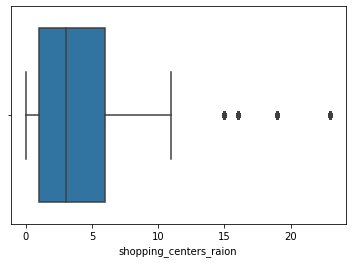

In [1065]:
sns.boxplot(X['shopping_centers_raion'])

In [1066]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['shopping_centers_raion']]) # обучение
X['anomaly_shopping_centers_raion']=clf.predict(X[['shopping_centers_raion']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_area_m,anomaly_raion_popul,anomaly_green_zone_part,anomaly_indust_part,anomaly_preschool_education_centers_raion,anomaly_school_education_centers_raion,anomaly_healthcare_centers_raion,anomaly_sport_objects_raion,anomaly_additional_education_raion,anomaly_shopping_centers_raion
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,1,1,1,-1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,1,1,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,1,1,1,1,1,-1,1,-1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,1,1,1,1,1,1


In [1067]:
anomaly=X.loc[X['anomaly_shopping_centers_raion']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'shopping_centers_raion'] = data['shopping_centers_raion'].median()
print(anomaly['shopping_centers_raion'])

0        16
7        16
32       16
70       16
72       19
         ..
30377    23
30436    16
30441    23
30465    23
30467    23
Name: shopping_centers_raion, Length: 1081, dtype: int64


In [1068]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1069]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1070]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3409546.0553814224

In [1071]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1072]:
r2_score(Y_train, y_train_predict)

0.48658186058751884

In [1073]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1074]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3529900.554041022

In [1075]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1076]:
r2_score(Y_test, y_test_predict)

0.47366524389510545

In [1077]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([23727.,  3928.,   647.,   133.,   331.,     0.,    96.,    37.,
          199.,   173.,    94.,     0.,    50.,     0.,   190.,    90.,
           98.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
          678.]),
 array([  0.  ,   5.64,  11.28,  16.92,  22.56,  28.2 ,  33.84,  39.48,
         45.12,  50.76,  56.4 ,  62.04,  67.68,  73.32,  78.96,  84.6 ,
         90.24,  95.88, 101.52, 107.16, 112.8 , 118.44, 124.08, 129.72,
        135.36, 141.  ]),
 <BarContainer object of 25 artists>)

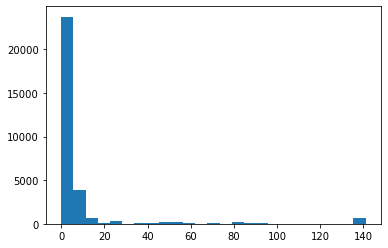

In [1078]:
plt.hist(X['office_raion'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='office_raion'>

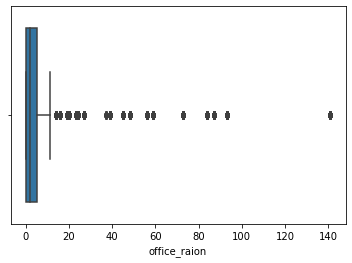

In [1079]:
sns.boxplot(X['office_raion'])

In [1080]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['office_raion']]) # обучение
X['anomaly_office_raion']=clf.predict(X[['office_raion']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_raion_popul,anomaly_green_zone_part,anomaly_indust_part,anomaly_preschool_education_centers_raion,anomaly_school_education_centers_raion,anomaly_healthcare_centers_raion,anomaly_sport_objects_raion,anomaly_additional_education_raion,anomaly_shopping_centers_raion,anomaly_office_raion
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,1,1,-1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,1,-1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,1,1,1,1,-1,1,-1,-1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,1,1,1,1,1,1


In [1081]:
anomaly=X.loc[X['anomaly_office_raion']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'office_raion'] = data['office_raion'].median()
print(anomaly['office_raion'])

4         93
13        84
72        56
83        93
95        87
        ... 
30406     84
30440     93
30441    141
30465    141
30467    141
Name: office_raion, Length: 1506, dtype: int64


In [1082]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1083]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1084]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3471565.1494970527

In [1085]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1086]:
r2_score(Y_train, y_train_predict)

0.4774958201586611

In [1087]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1088]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3273590.8143909066

In [1089]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1090]:
r2_score(Y_test, y_test_predict)

0.5124879645885582

In [1091]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([1776., 1895., 4060., 2069., 4345., 1346.,  994., 1254., 1298.,
         978., 1077.,  603., 2403., 1481.,  896.,  752.,  393.,  202.,
         278.,  328.,  171.,  153.,  110., 1579.,   30.]),
 array([  1.  ,   9.88,  18.76,  27.64,  36.52,  45.4 ,  54.28,  63.16,
         72.04,  80.92,  89.8 ,  98.68, 107.56, 116.44, 125.32, 134.2 ,
        143.08, 151.96, 160.84, 169.72, 178.6 , 187.48, 196.36, 205.24,
        214.12, 223.  ]),
 <BarContainer object of 25 artists>)

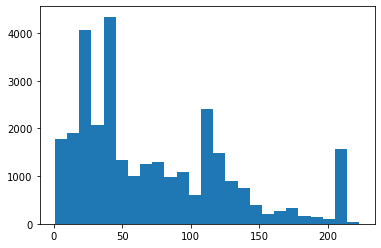

In [1092]:
plt.hist(X['ID_metro'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ID_metro'>

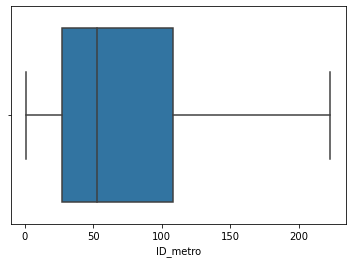

In [1093]:
sns.boxplot(X['ID_metro'])

In [1094]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['ID_metro']]) # обучение
X['anomaly_ID_metro']=clf.predict(X[['ID_metro']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_green_zone_part,anomaly_indust_part,anomaly_preschool_education_centers_raion,anomaly_school_education_centers_raion,anomaly_healthcare_centers_raion,anomaly_sport_objects_raion,anomaly_additional_education_raion,anomaly_shopping_centers_raion,anomaly_office_raion,anomaly_ID_metro
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,1,-1,1,-1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,-1,1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,1,1,1,-1,1,-1,-1,-1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,1,1,1,1,1,1


In [1095]:
anomaly=X.loc[X['anomaly_ID_metro']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'ID_metro'] = data['ID_metro'].median()
print(anomaly['ID_metro'])

0          1
70         1
366        1
589      151
595      152
        ... 
30417    172
30436      1
30438    163
30464    189
30467    187
Name: ID_metro, Length: 1481, dtype: int64


In [1096]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1097]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1098]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3368762.807154454

In [1099]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1100]:
r2_score(Y_train, y_train_predict)

0.4883280878445271

In [1101]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1102]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3664680.9499265887

In [1103]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1104]:
r2_score(Y_test, y_test_predict)

0.4737800719783831

In [1105]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([2.0271e+04, 4.1000e+03, 3.3660e+03, 3.6900e+02, 2.3000e+01,
        8.4900e+02, 4.2000e+01, 2.5100e+02, 2.3700e+02, 4.8400e+02,
        1.8100e+02, 1.0600e+02, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 3.0000e+00, 3.0000e+00, 1.4900e+02, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 3.2000e+01]),
 array([  0.        ,  28.44863223,  56.89726446,  85.3458967 ,
        113.79452893, 142.24316116, 170.69179339, 199.14042562,
        227.58905786, 256.03769009, 284.48632232, 312.93495455,
        341.38358678, 369.83221902, 398.28085125, 426.72948348,
        455.17811571, 483.62674794, 512.07538018, 540.52401241,
        568.97264464, 597.42127687, 625.8699091 , 654.31854134,
        682.76717357, 711.2158058 ]),
 <BarContainer object of 25 artists>)

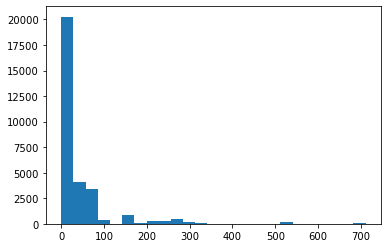

In [1106]:
plt.hist(X['metro_min_walk'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='metro_min_walk'>

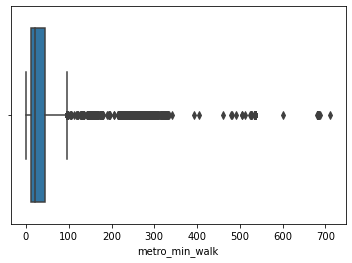

In [1107]:
sns.boxplot(X['metro_min_walk'])

In [1108]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['metro_min_walk']]) # обучение
X['anomaly_metro_min_walk']=clf.predict(X[['metro_min_walk']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_indust_part,anomaly_preschool_education_centers_raion,anomaly_school_education_centers_raion,anomaly_healthcare_centers_raion,anomaly_sport_objects_raion,anomaly_additional_education_raion,anomaly_shopping_centers_raion,anomaly_office_raion,anomaly_ID_metro,anomaly_metro_min_walk
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,-1,1,-1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,-1,1,1,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,1,1,-1,1,-1,-1,-1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,1,1,1,1,1,1


In [1109]:
anomaly=X.loc[X['anomaly_metro_min_walk']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'metro_min_walk'] = data['metro_min_walk'].median()
print(anomaly['metro_min_walk'])

34       264.435762
87       250.555809
112      269.267194
122      261.594310
154      286.371019
            ...    
30312    534.645955
30329    534.645955
30391    248.565193
30398    327.917655
30451    534.645955
Name: metro_min_walk, Length: 1510, dtype: float64


In [1110]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1111]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1112]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3460420.6164234392

In [1113]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1114]:
r2_score(Y_train, y_train_predict)

0.48425352625900986

In [1115]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1116]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3297574.051874603

In [1117]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1118]:
r2_score(Y_test, y_test_predict)

0.4912087659174911

In [1119]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([2.4077e+04, 2.8210e+03, 1.5070e+03, 1.6360e+03, 1.3200e+02,
        8.0000e+00, 4.1000e+01, 4.0000e+00, 2.8000e+01, 3.2000e+01,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.0000e+00,
        1.4300e+02, 3.0000e+01, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([4.69748000e-04, 1.16388191e+00, 2.32729407e+00, 3.49070624e+00,
        4.65411840e+00, 5.81753056e+00, 6.98094273e+00, 8.14435489e+00,
        9.30776705e+00, 1.04711792e+01, 1.16345914e+01, 1.27980035e+01,
        1.39614157e+01, 1.51248279e+01, 1.62882400e+01, 1.74516522e+01,
        1.86150644e+01, 1.97784765e+01, 2.09418887e+01, 2.21053009e+01,
        2.32687130e+01, 2.44321252e+01, 2.55955373e+01, 2.67589495e+01,
        2.79223617e+01, 2.90857738e+01]),
 <BarContainer object of 25 artists>)

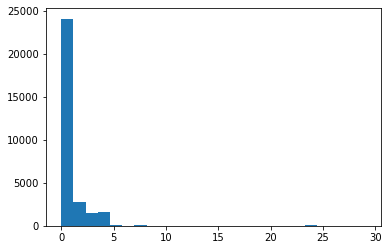

In [1120]:
plt.hist(X['kindergarten_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kindergarten_km'>

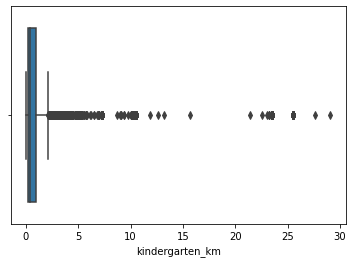

In [1121]:
sns.boxplot(X['kindergarten_km'])

In [1122]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['kindergarten_km']]) # обучение
X['anomaly_kindergarten_km']=clf.predict(X[['kindergarten_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_preschool_education_centers_raion,anomaly_school_education_centers_raion,anomaly_healthcare_centers_raion,anomaly_sport_objects_raion,anomaly_additional_education_raion,anomaly_shopping_centers_raion,anomaly_office_raion,anomaly_ID_metro,anomaly_metro_min_walk,anomaly_kindergarten_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,-1,1,-1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,-1,1,1,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,1,-1,1,-1,-1,-1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,1,1,1,1,1,1


In [1123]:
anomaly=X.loc[X['anomaly_kindergarten_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'kindergarten_km'] = data['kindergarten_km'].median()
print(anomaly['kindergarten_km'])

87        1.884946
88        1.899138
175       0.000628
278       2.120892
296       0.001570
           ...    
30391     1.840725
30398    10.493868
30418     1.993794
30426     2.089591
30451    23.526686
Name: kindergarten_km, Length: 1383, dtype: float64


In [1124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1125]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1126]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3524760.7468723045

In [1127]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1128]:
r2_score(Y_train, y_train_predict)

0.4856805798567938

In [1129]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1130]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3029197.086293907

In [1131]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1132]:
r2_score(Y_test, y_test_predict)

0.47894216100357956

In [1133]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([2.589e+04, 2.530e+03, 8.150e+02, 2.940e+02, 4.140e+02, 7.000e+00,
        1.590e+02, 1.660e+02, 1.000e+00, 5.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.490e+02, 1.000e+00, 1.000e+00, 5.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.000e+01]),
 array([ 0.        ,  1.89578824,  3.79157648,  5.68736473,  7.58315297,
         9.47894121, 11.37472945, 13.27051769, 15.16630594, 17.06209418,
        18.95788242, 20.85367066, 22.7494589 , 24.64524715, 26.54103539,
        28.43682363, 30.33261187, 32.22840011, 34.12418836, 36.0199766 ,
        37.91576484, 39.81155308, 41.70734132, 43.60312957, 45.49891781,
        47.39470605]),
 <BarContainer object of 25 artists>)

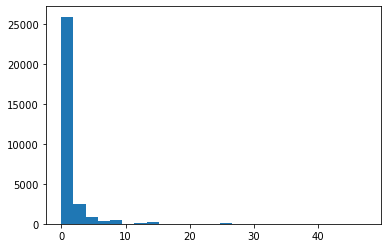

In [1134]:
plt.hist(X['school_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='school_km'>

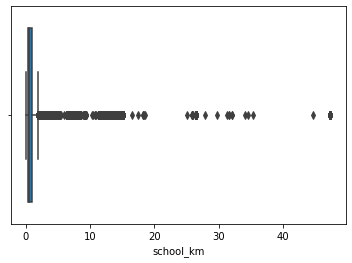

In [1135]:
sns.boxplot(X['school_km'])

In [1136]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['school_km']]) # обучение
X['anomaly_school_km']=clf.predict(X[['school_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_school_education_centers_raion,anomaly_healthcare_centers_raion,anomaly_sport_objects_raion,anomaly_additional_education_raion,anomaly_shopping_centers_raion,anomaly_office_raion,anomaly_ID_metro,anomaly_metro_min_walk,anomaly_kindergarten_km,anomaly_school_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,-1,1,-1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,-1,1,1,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,-1,1,-1,-1,-1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,1,1,1,1,1,1


In [1137]:
anomaly=X.loc[X['anomaly_school_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'school_km'] = data['school_km'].median()
print(anomaly['school_km'])

2252      4.734775
2592     12.358465
2648     13.565500
2715      7.671322
2803      7.671322
           ...    
30353     7.872947
30364     7.671322
30380     7.671322
30398    12.444870
30451    26.499723
Name: school_km, Length: 1499, dtype: float64


In [1138]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1139]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1140]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3442590.919124625

In [1141]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1142]:
r2_score(Y_train, y_train_predict)

0.48498072350244026

In [1143]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1144]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3383312.408371541

In [1145]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1146]:
r2_score(Y_test, y_test_predict)

0.4841882291427053

In [1147]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([1.594e+04, 7.807e+03, 3.246e+03, 1.006e+03, 1.400e+02, 5.780e+02,
        2.930e+02, 1.830e+02, 8.130e+02, 4.150e+02, 7.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 5.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.000e+01]),
 array([3.73717500e-03, 1.89764922e+00, 3.79156127e+00, 5.68547331e+00,
        7.57938536e+00, 9.47329740e+00, 1.13672094e+01, 1.32611215e+01,
        1.51550335e+01, 1.70489456e+01, 1.89428576e+01, 2.08367697e+01,
        2.27306817e+01, 2.46245938e+01, 2.65185058e+01, 2.84124179e+01,
        3.03063299e+01, 3.22002420e+01, 3.40941540e+01, 3.59880660e+01,
        3.78819781e+01, 3.97758901e+01, 4.16698022e+01, 4.35637142e+01,
        4.54576263e+01, 4.73515383e+01]),
 <BarContainer object of 25 artists>)

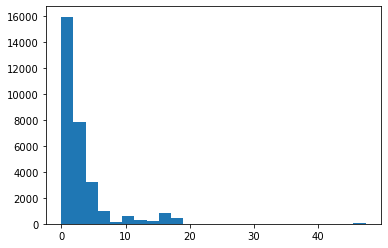

In [1148]:
plt.hist(X['park_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='park_km'>

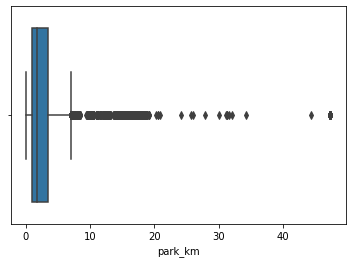

In [1149]:
sns.boxplot(X['park_km'])

In [1150]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['park_km']]) # обучение
X['anomaly_park_km']=clf.predict(X[['park_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_healthcare_centers_raion,anomaly_sport_objects_raion,anomaly_additional_education_raion,anomaly_shopping_centers_raion,anomaly_office_raion,anomaly_ID_metro,anomaly_metro_min_walk,anomaly_kindergarten_km,anomaly_school_km,anomaly_park_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,-1,1,-1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,-1,1,1,-1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,-1,1,-1,-1,-1,1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,1,1,1,1,1,1


In [1151]:
anomaly=X.loc[X['anomaly_park_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'park_km'] = data['park_km'].median()
print(anomaly['park_km'])

20        9.901545
34       16.465054
112      18.135363
122      17.231962
154      14.560247
           ...    
30290    10.013521
30353    10.013521
30391    14.992092
30398    16.918249
30429     8.284037
Name: park_km, Length: 1523, dtype: float64


In [1152]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1153]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1154]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3454295.530944251

In [1155]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1156]:
r2_score(Y_train, y_train_predict)

0.48135249426040216

In [1157]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1158]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3322477.7105467916

In [1159]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1160]:
r2_score(Y_test, y_test_predict)

0.5031557100445662

In [1161]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([6.559e+03, 4.324e+03, 5.573e+03, 3.250e+03, 2.612e+03, 2.145e+03,
        1.631e+03, 1.615e+03, 8.020e+02, 4.410e+02, 2.620e+02, 1.600e+02,
        3.650e+02, 5.400e+01, 2.700e+01, 1.300e+01, 3.000e+01, 9.200e+01,
        3.500e+01, 3.500e+01, 2.000e+01, 2.390e+02, 3.100e+01, 6.000e+00,
        1.500e+02]),
 array([0.        , 0.07929792, 0.15859585, 0.23789377, 0.3171917 ,
        0.39648962, 0.47578755, 0.55508547, 0.63438339, 0.71368132,
        0.79297924, 0.87227717, 0.95157509, 1.03087302, 1.11017094,
        1.18946887, 1.26876679, 1.34806471, 1.42736264, 1.50666056,
        1.58595849, 1.66525641, 1.74455434, 1.82385226, 1.90315018,
        1.98244811]),
 <BarContainer object of 25 artists>)

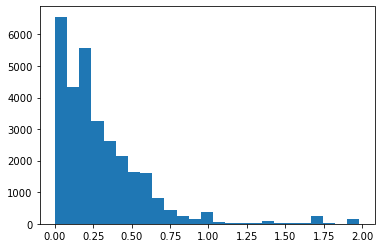

In [1162]:
plt.hist(X['green_zone_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='green_zone_km'>

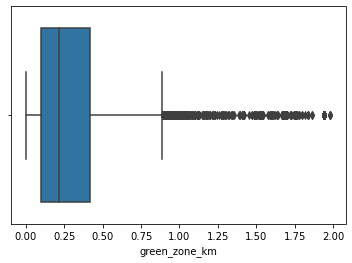

In [1163]:
sns.boxplot(X['green_zone_km'])

In [1164]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['green_zone_km']]) # обучение
X['anomaly_green_zone_km']=clf.predict(X[['green_zone_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_sport_objects_raion,anomaly_additional_education_raion,anomaly_shopping_centers_raion,anomaly_office_raion,anomaly_ID_metro,anomaly_metro_min_walk,anomaly_kindergarten_km,anomaly_school_km,anomaly_park_km,anomaly_green_zone_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,-1,1,-1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,-1,1,1,-1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,-1,1,-1,-1,-1,1,1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,1,1,1,1,1,1


In [1165]:
anomaly=X.loc[X['anomaly_green_zone_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'green_zone_km'] = data['green_zone_km'].median()
print(anomaly['green_zone_km'])

5        1.497903
19       0.811783
38       0.794952
114      0.808651
135      1.047523
           ...   
30383    1.815382
30388    1.594673
30389    1.669972
30438    0.903200
30457    0.833910
Name: green_zone_km, Length: 1523, dtype: float64


In [1166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1167]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1168]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3374407.825289615

In [1169]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1170]:
r2_score(Y_train, y_train_predict)

0.4970771558113466

In [1171]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1172]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3638924.0159224435

In [1173]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1174]:
r2_score(Y_test, y_test_predict)

0.4407959665899597

In [1175]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([1.4876e+04, 8.6980e+03, 4.2000e+03, 1.5000e+03, 9.9700e+02,
        2.1000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+01,
        1.4300e+02, 4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.        ,  0.56192648,  1.12385297,  1.68577945,  2.24770594,
         2.80963242,  3.37155891,  3.93348539,  4.49541188,  5.05733836,
         5.61926484,  6.18119133,  6.74311781,  7.3050443 ,  7.86697078,
         8.42889727,  8.99082375,  9.55275023, 10.11467672, 10.6766032 ,
        11.23852969, 11.80045617, 12.36238266, 12.92430914, 13.48623563,
        14.04816211]),
 <BarContainer object of 25 artists>)

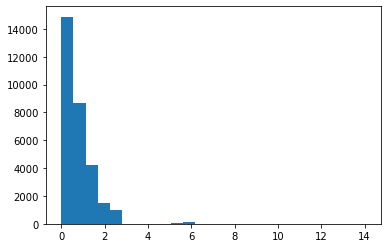

In [1176]:
plt.hist(X['industrial_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='industrial_km'>

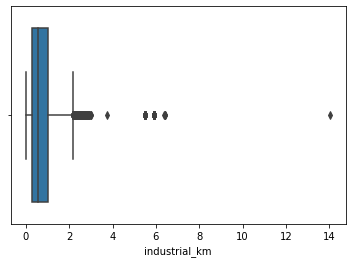

In [1177]:
sns.boxplot(X['industrial_km'])

In [1178]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['industrial_km']]) # обучение
X['anomaly_industrial_km']=clf.predict(X[['industrial_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_additional_education_raion,anomaly_shopping_centers_raion,anomaly_office_raion,anomaly_ID_metro,anomaly_metro_min_walk,anomaly_kindergarten_km,anomaly_school_km,anomaly_park_km,anomaly_green_zone_km,anomaly_industrial_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,-1,1,-1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,-1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,-1,-1,-1,1,1,1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,1,1,1,1,1,-1


In [1179]:
anomaly=X.loc[X['anomaly_industrial_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'industrial_km'] = data['industrial_km'].median()
print(anomaly['industrial_km'])

16       2.055711
92       2.280006
170      2.598081
174      2.111277
183      2.057494
           ...   
30441    2.640803
30451    5.910545
30457    2.196639
30465    2.640803
30469    2.397723
Name: industrial_km, Length: 1512, dtype: float64


In [1180]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1181]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1182]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3410994.4973844755

In [1183]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1184]:
r2_score(Y_train, y_train_predict)

0.5010745383924838

In [1185]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1186]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3474245.2768291133

In [1187]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1188]:
r2_score(Y_test, y_test_predict)

0.4233026661595871

In [1189]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([1.536e+03, 2.920e+03, 3.386e+03, 3.077e+03, 3.098e+03, 2.658e+03,
        2.873e+03, 2.183e+03, 1.833e+03, 2.062e+03, 9.320e+02, 1.247e+03,
        9.840e+02, 8.150e+02, 2.520e+02, 1.490e+02, 1.170e+02, 2.340e+02,
        3.900e+01, 2.000e+01, 1.900e+01, 1.100e+01, 3.000e+00, 1.800e+01,
        5.000e+00]),
 array([0.00670731, 0.11954738, 0.23238745, 0.34522751, 0.45806758,
        0.57090765, 0.68374772, 0.79658778, 0.90942785, 1.02226792,
        1.13510799, 1.24794805, 1.36078812, 1.47362819, 1.58646826,
        1.69930832, 1.81214839, 1.92498846, 2.03782852, 2.15066859,
        2.26350866, 2.37634873, 2.48918879, 2.60202886, 2.71486893,
        2.827709  ]),
 <BarContainer object of 25 artists>)

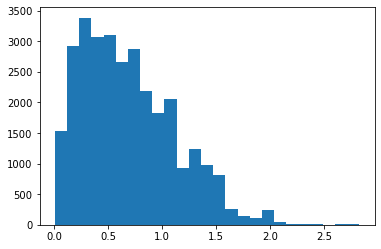

In [1190]:
plt.hist(X['water_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='water_km'>

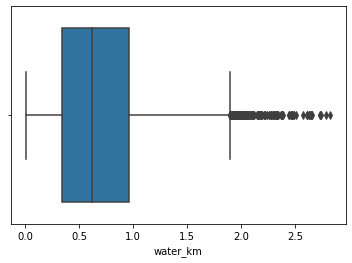

In [1191]:
sns.boxplot(X['water_km'])

In [1192]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['water_km']]) # обучение
X['anomaly_water_km']=clf.predict(X[['water_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km', 'anomaly_water_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_shopping_centers_raion,anomaly_office_raion,anomaly_ID_metro,anomaly_metro_min_walk,anomaly_kindergarten_km,anomaly_school_km,anomaly_park_km,anomaly_green_zone_km,anomaly_industrial_km,anomaly_water_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,-1,1,-1,1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,-1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,-1,-1,-1,1,1,1,1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,1,1,1,1,-1,1


In [1193]:
anomaly=X.loc[X['anomaly_water_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'water_km'] = data['water_km'].median()
print(anomaly['water_km'])

19       1.612676
58       1.675939
69       1.708699
79       1.724744
130      0.042376
           ...   
30255    1.796862
30412    1.615573
30417    1.843190
30438    1.936715
30442    0.006707
Name: water_km, Length: 1524, dtype: float64


In [1194]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1195]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1196]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3342442.4376387214

In [1197]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1198]:
r2_score(Y_train, y_train_predict)

0.4934403433534459

In [1199]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1200]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3727833.6494062594

In [1201]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1202]:
r2_score(Y_test, y_test_predict)

0.4659117480798546

In [1203]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([5.749e+03, 6.884e+03, 5.763e+03, 5.040e+03, 2.788e+03, 1.847e+03,
        9.230e+02, 4.000e+01, 5.830e+02, 6.000e+02, 6.200e+01, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 5.000e+00, 1.490e+02,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        3.000e+01]),
 array([1.36261820e-02, 2.14419443e+00, 4.27476269e+00, 6.40533094e+00,
        8.53589919e+00, 1.06664674e+01, 1.27970357e+01, 1.49276039e+01,
        1.70581722e+01, 1.91887405e+01, 2.13193087e+01, 2.34498770e+01,
        2.55804452e+01, 2.77110135e+01, 2.98415817e+01, 3.19721500e+01,
        3.41027182e+01, 3.62332865e+01, 3.83638547e+01, 4.04944230e+01,
        4.26249912e+01, 4.47555595e+01, 4.68861277e+01, 4.90166960e+01,
        5.11472642e+01, 5.32778325e+01]),
 <BarContainer object of 25 artists>)

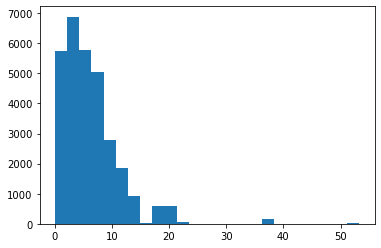

In [1204]:
plt.hist(X['mkad_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mkad_km'>

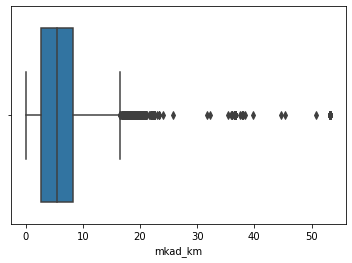

In [1205]:
sns.boxplot(X['mkad_km'])

In [1206]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['mkad_km']]) # обучение
X['anomaly_mkad_km']=clf.predict(X[['mkad_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km', 'anomaly_water_km', 'anomaly_mkad_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_office_raion,anomaly_ID_metro,anomaly_metro_min_walk,anomaly_kindergarten_km,anomaly_school_km,anomaly_park_km,anomaly_green_zone_km,anomaly_industrial_km,anomaly_water_km,anomaly_mkad_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,-1,1,1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,-1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,-1,-1,1,1,1,1,1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,1,1,1,-1,1,1


In [1207]:
anomaly=X.loc[X['anomaly_mkad_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'mkad_km'] = data['mkad_km'].median()
print(anomaly['mkad_km'])

32        0.227407
34       19.010275
78        0.138288
87       18.475722
112      20.471973
           ...    
30391    17.293729
30398    22.464884
30426     0.013626
30451    36.665459
30457     0.205334
Name: mkad_km, Length: 1522, dtype: float64


In [1208]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1209]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1210]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3466990.762686011

In [1211]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1212]:
r2_score(Y_train, y_train_predict)

0.4859704792500005

In [1213]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1214]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3239775.964618295

In [1215]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1216]:
r2_score(Y_test, y_test_predict)

0.4929801099693981

In [1217]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([3.086e+03, 4.455e+03, 4.283e+03, 4.562e+03, 3.504e+03, 3.460e+03,
        2.391e+03, 1.839e+03, 7.720e+02, 6.160e+02, 6.100e+01, 4.380e+02,
        7.870e+02, 2.700e+01, 0.000e+00, 0.000e+00, 1.000e+00, 1.480e+02,
        2.000e+00, 6.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        3.100e+01]),
 array([1.93475500e-03, 2.64318538e+00, 5.28443600e+00, 7.92568662e+00,
        1.05669372e+01, 1.32081879e+01, 1.58494385e+01, 1.84906891e+01,
        2.11319397e+01, 2.37731903e+01, 2.64144410e+01, 2.90556916e+01,
        3.16969422e+01, 3.43381928e+01, 3.69794434e+01, 3.96206941e+01,
        4.22619447e+01, 4.49031953e+01, 4.75444459e+01, 5.01856965e+01,
        5.28269472e+01, 5.54681978e+01, 5.81094484e+01, 6.07506990e+01,
        6.33919496e+01, 6.60332003e+01]),
 <BarContainer object of 25 artists>)

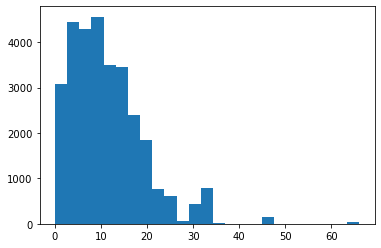

In [1218]:
plt.hist(X['ttk_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ttk_km'>

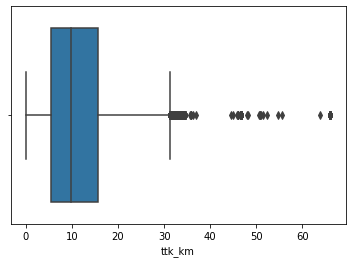

In [1219]:
sns.boxplot(X['ttk_km'])

In [1220]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['ttk_km']]) # обучение
X['anomaly_ttk_km']=clf.predict(X[['ttk_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km', 'anomaly_water_km', 'anomaly_mkad_km', 'anomaly_ttk_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_ID_metro,anomaly_metro_min_walk,anomaly_kindergarten_km,anomaly_school_km,anomaly_park_km,anomaly_green_zone_km,anomaly_industrial_km,anomaly_water_km,anomaly_mkad_km,anomaly_ttk_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,-1,1,1,1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,-1,1,1,1,1,1,1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,1,1,-1,1,1,1


In [1221]:
anomaly=X.loc[X['anomaly_ttk_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'ttk_km'] = data['ttk_km'].median()
print(anomaly['ttk_km'])

34       32.491110
112      33.979029
122      33.207666
154      30.720370
208      32.853635
           ...    
30312    46.592046
30329    46.592046
30391    30.800806
30398    32.651191
30451    46.592046
Name: ttk_km, Length: 1511, dtype: float64


In [1222]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1223]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1224]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3302960.1399166067

In [1225]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1226]:
r2_score(Y_train, y_train_predict)

0.4955144719125878

In [1227]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1228]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3888657.312184505

In [1229]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1230]:
r2_score(Y_test, y_test_predict)

0.45480885947990457

In [1231]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([1.902e+03, 1.824e+03, 3.769e+03, 4.750e+03, 4.768e+03, 2.997e+03,
        3.470e+03, 2.971e+03, 1.205e+03, 1.244e+03, 1.110e+02, 5.400e+01,
        9.050e+02, 3.060e+02, 5.000e+00, 0.000e+00, 0.000e+00, 1.490e+02,
        2.000e+00, 5.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        3.100e+01]),
 array([3.55499000e-04, 2.75446315e+00, 5.50857080e+00, 8.26267845e+00,
        1.10167861e+01, 1.37708937e+01, 1.65250014e+01, 1.92791090e+01,
        2.20332167e+01, 2.47873243e+01, 2.75414320e+01, 3.02955396e+01,
        3.30496473e+01, 3.58037549e+01, 3.85578626e+01, 4.13119702e+01,
        4.40660779e+01, 4.68201855e+01, 4.95742932e+01, 5.23284008e+01,
        5.50825085e+01, 5.78366161e+01, 6.05907238e+01, 6.33448314e+01,
        6.60989391e+01, 6.88530467e+01]),
 <BarContainer object of 25 artists>)

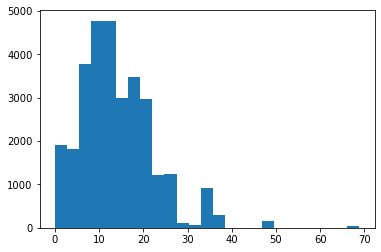

In [1232]:
plt.hist(X['sadovoe_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sadovoe_km'>

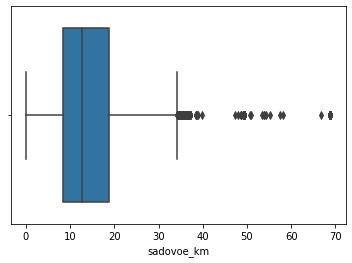

In [1233]:
sns.boxplot(X['sadovoe_km'])

In [1234]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['sadovoe_km']]) # обучение
X['anomaly_sadovoe_km']=clf.predict(X[['sadovoe_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km', 'anomaly_water_km', 'anomaly_mkad_km', 'anomaly_ttk_km', 'anomaly_sadovoe_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_metro_min_walk,anomaly_kindergarten_km,anomaly_school_km,anomaly_park_km,anomaly_green_zone_km,anomaly_industrial_km,anomaly_water_km,anomaly_mkad_km,anomaly_ttk_km,anomaly_sadovoe_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,1,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,1,1,1,1,1,1,1,-1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,1,-1,1,1,1,1


In [1235]:
anomaly=X.loc[X['anomaly_sadovoe_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'sadovoe_km'] = data['sadovoe_km'].median()
print(anomaly['sadovoe_km'])

4         0.046810
72        1.162955
95        1.214017
101       1.194867
112      36.608370
           ...    
30406     0.677592
30412     1.311918
30440     0.412440
30451    49.312037
30467     1.203215
Name: sadovoe_km, Length: 1518, dtype: float64


In [1236]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1237]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1238]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3424060.0919708805

In [1239]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1240]:
r2_score(Y_train, y_train_predict)

0.47630407209864023

In [1241]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1242]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3494282.6438698205

In [1243]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1244]:
r2_score(Y_test, y_test_predict)

0.5050300892349698

In [1245]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([9.560e+02, 1.334e+03, 2.609e+03, 4.250e+03, 5.153e+03, 4.593e+03,
        2.300e+03, 4.294e+03, 1.383e+03, 1.462e+03, 6.260e+02, 7.100e+01,
        5.550e+02, 6.890e+02, 6.000e+00, 0.000e+00, 0.000e+00, 6.000e+00,
        1.450e+02, 5.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        3.100e+01]),
 array([ 0.07289655,  2.89953146,  5.72616636,  8.55280126, 11.37943617,
        14.20607107, 17.03270598, 19.85934088, 22.68597578, 25.51261069,
        28.33924559, 31.1658805 , 33.9925154 , 36.8191503 , 39.64578521,
        42.47242011, 45.29905502, 48.12568992, 50.95232482, 53.77895973,
        56.60559463, 59.43222953, 62.25886444, 65.08549934, 67.91213425,
        70.73876915]),
 <BarContainer object of 25 artists>)

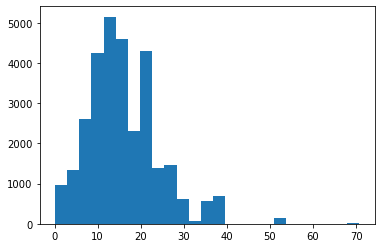

In [1246]:
plt.hist(X['kremlin_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kremlin_km'>

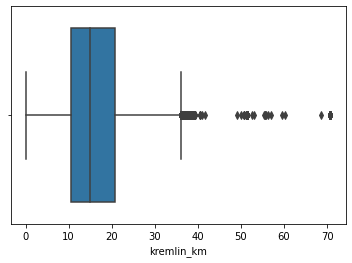

In [1247]:
sns.boxplot(X['kremlin_km'])

In [1248]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['kremlin_km']]) # обучение
X['anomaly_kremlin_km']=clf.predict(X[['kremlin_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km', 'anomaly_water_km', 'anomaly_mkad_km', 'anomaly_ttk_km', 'anomaly_sadovoe_km',
'anomaly_bulvar_ring_km', 'anomaly_kremlin_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_school_km,anomaly_park_km,anomaly_green_zone_km,anomaly_industrial_km,anomaly_water_km,anomaly_mkad_km,anomaly_ttk_km,anomaly_sadovoe_km,anomaly_bulvar_ring_km,anomaly_kremlin_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,1,1,NaN,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,NaN,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,NaN,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,NaN,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,1,1,-1,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,NaN,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,1,1,1,1,1,-1,NaN,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,NaN,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,-1,1,1,1,1,NaN,1


In [1249]:
anomaly=X.loc[X['anomaly_kremlin_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'kremlin_km'] = data['kremlin_km'].median()
print(anomaly['kremlin_km'])

112      38.633546
122      37.903614
154      35.497808
240      38.632931
313       0.072897
           ...    
30391    35.457193
30440     2.049792
30441     0.072897
30451    51.349687
30465     0.072897
Name: kremlin_km, Length: 1524, dtype: float64


In [1250]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1251]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1252]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3368800.232758996

In [1253]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1254]:
r2_score(Y_train, y_train_predict)

0.49489902064959657

In [1255]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1256]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3666355.013747918

In [1257]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1258]:
r2_score(Y_test, y_test_predict)

0.4484048328584269

In [1259]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([8.026e+03, 9.655e+03, 7.429e+03, 1.624e+03, 1.278e+03, 6.030e+02,
        3.670e+02, 5.000e+01, 7.590e+02, 4.600e+02, 2.500e+01, 5.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.480e+02, 2.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.100e+01]),
 array([ 0.        ,  2.16323654,  4.32647308,  6.48970962,  8.65294616,
        10.8161827 , 12.97941924, 15.14265577, 17.30589231, 19.46912885,
        21.63236539, 23.79560193, 25.95883847, 28.12207501, 30.28531155,
        32.44854809, 34.61178463, 36.77502117, 38.93825771, 41.10149424,
        43.26473078, 45.42796732, 47.59120386, 49.7544404 , 51.91767694,
        54.08091348]),
 <BarContainer object of 25 artists>)

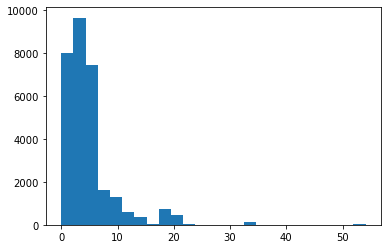

In [1260]:
plt.hist(X['ts_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ts_km'>

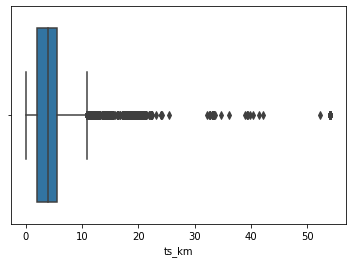

In [1261]:
sns.boxplot(X['ts_km'])

In [1262]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['ts_km']]) # обучение
X['anomaly_ts_km']=clf.predict(X[['ts_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km', 'anomaly_water_km', 'anomaly_mkad_km', 'anomaly_ttk_km', 'anomaly_sadovoe_km',
'anomaly_bulvar_ring_km', 'anomaly_kremlin_km', 'anomaly_ts_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_park_km,anomaly_green_zone_km,anomaly_industrial_km,anomaly_water_km,anomaly_mkad_km,anomaly_ttk_km,anomaly_sadovoe_km,anomaly_bulvar_ring_km,anomaly_kremlin_km,anomaly_ts_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,1,NaN,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,NaN,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,NaN,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,NaN,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,1,-1,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,NaN,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,1,1,1,1,-1,NaN,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,NaN,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,-1,1,1,1,1,NaN,1,1


In [1263]:
anomaly=X.loc[X['anomaly_ts_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'ts_km'] = data['ts_km'].median()
print(anomaly['ts_km'])

31        0.286853
87       18.619923
96        0.228151
112      20.158207
122      19.708471
           ...    
30329    33.214743
30340     0.231913
30376     0.231913
30391    17.085923
30451    33.214743
Name: ts_km, Length: 1512, dtype: float64


In [1264]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1265]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1266]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3469318.3430260443

In [1267]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1268]:
r2_score(Y_train, y_train_predict)

0.48296202389410514

In [1269]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1270]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3268798.2242960175

In [1271]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1272]:
r2_score(Y_test, y_test_predict)

0.4942542510973076

In [1273]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([1.407e+03, 2.861e+03, 3.635e+03, 4.107e+03, 4.025e+03, 3.646e+03,
        3.825e+03, 1.982e+03, 1.652e+03, 7.550e+02, 6.720e+02, 6.040e+02,
        1.200e+02, 6.100e+01, 1.000e+00, 9.800e+01, 1.020e+02, 4.620e+02,
        3.540e+02, 6.800e+01, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        3.200e+01]),
 array([ 0.66136622,  3.01497751,  5.3685888 ,  7.72220009, 10.07581137,
        12.42942266, 14.78303395, 17.13664524, 19.49025653, 21.84386782,
        24.1974791 , 26.55109039, 28.90470168, 31.25831297, 33.61192426,
        35.96553555, 38.31914683, 40.67275812, 43.02636941, 45.3799807 ,
        47.73359199, 50.08720328, 52.44081456, 54.79442585, 57.14803714,
        59.50164843]),
 <BarContainer object of 25 artists>)

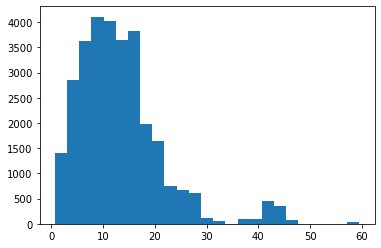

In [1274]:
plt.hist(X['big_market_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='big_market_km'>

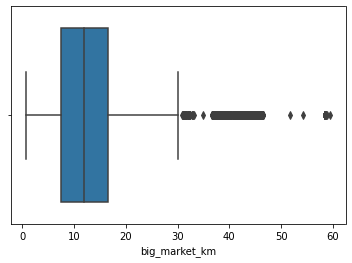

In [1275]:
sns.boxplot(X['big_market_km'])

In [1276]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['big_market_km']]) # обучение
X['anomaly_big_market_km']=clf.predict(X[['big_market_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km', 'anomaly_water_km', 'anomaly_mkad_km', 'anomaly_ttk_km', 'anomaly_sadovoe_km',
'anomaly_bulvar_ring_km', 'anomaly_kremlin_km', 'anomaly_ts_km', 'anomaly_big_market_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_green_zone_km,anomaly_industrial_km,anomaly_water_km,anomaly_mkad_km,anomaly_ttk_km,anomaly_sadovoe_km,anomaly_bulvar_ring_km,anomaly_kremlin_km,anomaly_ts_km,anomaly_big_market_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,NaN,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,NaN,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,NaN,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,NaN,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,-1,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,NaN,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,1,1,1,-1,NaN,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,NaN,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,-1,1,1,1,1,NaN,1,1,1


In [1277]:
anomaly=X.loc[X['anomaly_big_market_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'big_market_km'] = data['big_market_km'].median()
print(anomaly['big_market_km'])

34       42.139597
87       41.002734
88       29.303498
112      46.000778
122      43.328099
           ...    
30329    44.624118
30363     1.009534
30391    42.714630
30398    29.188429
30451    44.624118
Name: big_market_km, Length: 1521, dtype: float64


In [1278]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1279]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1280]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3486502.546975191

In [1281]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1282]:
r2_score(Y_train, y_train_predict)

0.4836683345098286

In [1283]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1284]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3190845.7068979284

In [1285]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1286]:
r2_score(Y_test, y_test_predict)

0.4924199539316275

In [1287]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([8.175e+03, 8.371e+03, 4.194e+03, 4.564e+03, 2.724e+03, 1.170e+03,
        4.850e+02, 3.220e+02, 2.740e+02, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 7.000e+00, 1.470e+02, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        3.100e+01]),
 array([3.84714600e-03, 1.64783929e+00, 3.29183143e+00, 4.93582358e+00,
        6.57981572e+00, 8.22380786e+00, 9.86780001e+00, 1.15117922e+01,
        1.31557843e+01, 1.47997764e+01, 1.64437686e+01, 1.80877607e+01,
        1.97317529e+01, 2.13757450e+01, 2.30197372e+01, 2.46637293e+01,
        2.63077214e+01, 2.79517136e+01, 2.95957057e+01, 3.12396979e+01,
        3.28836900e+01, 3.45276822e+01, 3.61716743e+01, 3.78156665e+01,
        3.94596586e+01, 4.11036507e+01]),
 <BarContainer object of 25 artists>)

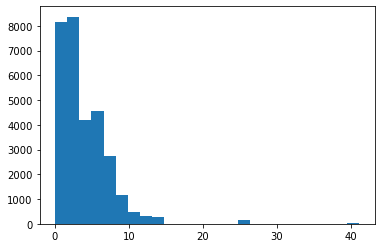

In [1288]:
plt.hist(X['market_shop_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='market_shop_km'>

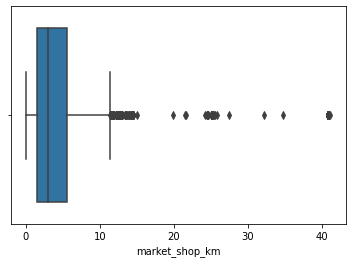

In [1289]:
sns.boxplot(X['market_shop_km'])

In [1290]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['market_shop_km']]) # обучение
X['anomaly_market_shop_km']=clf.predict(X[['market_shop_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km', 'anomaly_water_km', 'anomaly_mkad_km', 'anomaly_ttk_km', 'anomaly_sadovoe_km',
'anomaly_bulvar_ring_km', 'anomaly_kremlin_km', 'anomaly_ts_km', 'anomaly_big_market_km', 'anomaly_market_shop_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_industrial_km,anomaly_water_km,anomaly_mkad_km,anomaly_ttk_km,anomaly_sadovoe_km,anomaly_bulvar_ring_km,anomaly_kremlin_km,anomaly_ts_km,anomaly_big_market_km,anomaly_market_shop_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,NaN,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,NaN,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,NaN,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,NaN,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,-1,NaN,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,NaN,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,1,1,-1,NaN,1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,NaN,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,-1,1,1,1,1,NaN,1,1,1,1


In [1291]:
anomaly=X.loc[X['anomaly_market_shop_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'market_shop_km'] = data['market_shop_km'].median()
print(anomaly['market_shop_km'])

18        0.222506
37        0.126603
50        0.126603
98        0.274357
127       0.246696
           ...    
30341    10.539046
30353    14.300333
30450     0.239972
30451    25.085530
30457    10.590372
Name: market_shop_km, Length: 1520, dtype: float64


In [1292]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1293]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1294]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3443771.564921591

In [1295]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1296]:
r2_score(Y_train, y_train_predict)

0.49317373896869965

In [1297]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1298]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3377855.0728821354

In [1299]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1300]:
r2_score(Y_test, y_test_predict)

0.4471506744137964

In [1301]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([2.1211e+04, 5.0610e+03, 2.1440e+03, 8.2400e+02, 3.6300e+02,
        5.3100e+02, 1.7000e+02, 8.1000e+01, 2.1000e+01, 4.0000e+00,
        1.2000e+01, 9.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+01, 1.0000e+00]),
 array([ 0.        ,  1.06610018,  2.13220037,  3.19830055,  4.26440073,
         5.33050092,  6.3966011 ,  7.46270128,  8.52880147,  9.59490165,
        10.66100183, 11.72710202, 12.7932022 , 13.85930238, 14.92540256,
        15.99150275, 17.05760293, 18.12370311, 19.1898033 , 20.25590348,
        21.32200366, 22.38810385, 23.45420403, 24.52030421, 25.5864044 ,
        26.65250458]),
 <BarContainer object of 25 artists>)

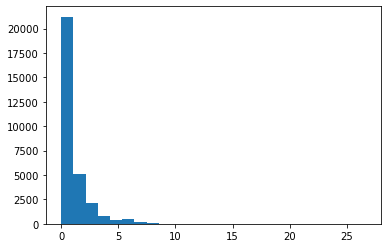

In [1302]:
plt.hist(X['fitness_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fitness_km'>

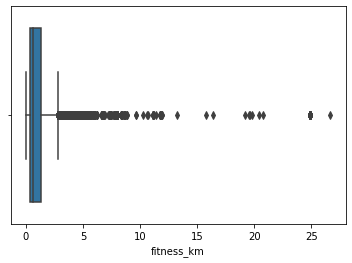

In [1303]:
sns.boxplot(X['fitness_km'])

In [1304]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['fitness_km']]) # обучение
X['anomaly_fitness_km']=clf.predict(X[['fitness_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km', 'anomaly_water_km', 'anomaly_mkad_km', 'anomaly_ttk_km', 'anomaly_sadovoe_km',
'anomaly_bulvar_ring_km', 'anomaly_kremlin_km', 'anomaly_ts_km', 'anomaly_big_market_km', 'anomaly_market_shop_km',
'anomaly_fitness_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_water_km,anomaly_mkad_km,anomaly_ttk_km,anomaly_sadovoe_km,anomaly_bulvar_ring_km,anomaly_kremlin_km,anomaly_ts_km,anomaly_big_market_km,anomaly_market_shop_km,anomaly_fitness_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,NaN,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,NaN,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,NaN,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,NaN,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,-1,NaN,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,NaN,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,1,-1,NaN,1,1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,NaN,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,NaN,1,1,1,1,1


In [1305]:
anomaly=X.loc[X['anomaly_fitness_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'fitness_km'] = data['fitness_km'].median()
print(anomaly['fitness_km'])

8        0.000000
15       0.000000
20       6.789991
60       0.000000
201      0.000000
           ...   
30364    5.980372
30380    5.980372
30398    7.943188
30429    5.153025
30451    7.354662
Name: fitness_km, Length: 1524, dtype: float64


In [1306]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1307]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1308]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3414625.72399776

In [1309]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1310]:
r2_score(Y_train, y_train_predict)

0.482519807068561

In [1311]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1312]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3491347.039822482

In [1313]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1314]:
r2_score(Y_test, y_test_predict)

0.49447702244906566

In [1315]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([1.2853e+04, 5.5190e+03, 5.4170e+03, 3.0220e+03, 1.3780e+03,
        1.2020e+03, 5.0400e+02, 2.5300e+02, 1.1300e+02, 6.0000e+00,
        1.2000e+01, 2.0000e+00, 1.5100e+02, 4.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.1000e+01]),
 array([3.13421000e-04, 3.39478679e+00, 6.78926016e+00, 1.01837335e+01,
        1.35782069e+01, 1.69726803e+01, 2.03671537e+01, 2.37616270e+01,
        2.71561004e+01, 3.05505738e+01, 3.39450471e+01, 3.73395205e+01,
        4.07339939e+01, 4.41284673e+01, 4.75229406e+01, 5.09174140e+01,
        5.43118874e+01, 5.77063607e+01, 6.11008341e+01, 6.44953075e+01,
        6.78897809e+01, 7.12842542e+01, 7.46787276e+01, 7.80732010e+01,
        8.14676743e+01, 8.48621477e+01]),
 <BarContainer object of 25 artists>)

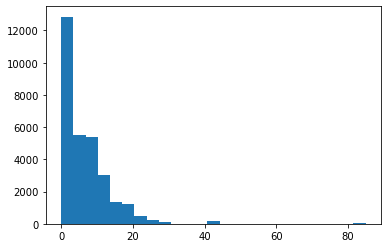

In [1316]:
plt.hist(X['university_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='university_km'>

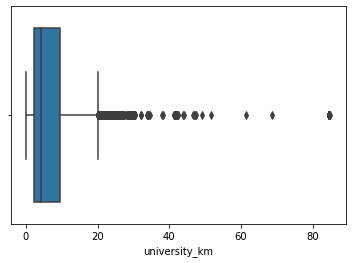

In [1317]:
sns.boxplot(X['university_km'])

In [1318]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['university_km']]) # обучение
X['anomaly_university_km']=clf.predict(X[['university_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km', 'anomaly_water_km', 'anomaly_mkad_km', 'anomaly_ttk_km', 'anomaly_sadovoe_km',
'anomaly_bulvar_ring_km', 'anomaly_kremlin_km', 'anomaly_ts_km', 'anomaly_big_market_km', 'anomaly_market_shop_km',
'anomaly_fitness_km', 'anomaly_university_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_mkad_km,anomaly_ttk_km,anomaly_sadovoe_km,anomaly_bulvar_ring_km,anomaly_kremlin_km,anomaly_ts_km,anomaly_big_market_km,anomaly_market_shop_km,anomaly_fitness_km,anomaly_university_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,NaN,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,NaN,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,NaN,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,NaN,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,-1,NaN,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,NaN,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,-1,NaN,1,1,1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,NaN,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,NaN,1,1,1,1,1,1


In [1319]:
anomaly=X.loc[X['anomaly_university_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'university_km'] = data['university_km'].median()
print(anomaly['university_km'])

20       18.242265
58        0.146793
79        0.338154
143       0.148045
204       0.057953
           ...    
30329    41.971774
30348    22.579699
30356     0.349341
30398    26.536086
30451    41.971774
Name: university_km, Length: 1524, dtype: float64


In [1320]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1321]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1322]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3435623.3316180375

In [1323]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1324]:
r2_score(Y_train, y_train_predict)

0.482075060891505

In [1325]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1326]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3409139.841731165

In [1327]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1328]:
r2_score(Y_test, y_test_predict)

0.4963136875318347

In [1329]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([1.6055e+04, 4.6940e+03, 4.3340e+03, 9.5700e+02, 2.6220e+03,
        6.0700e+02, 6.3200e+02, 2.8000e+01, 8.5000e+01, 1.8100e+02,
        8.0000e+01, 5.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 5.0000e+00, 1.4500e+02, 5.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+01]),
 array([ 0.        ,  2.21112899,  4.42225797,  6.63338696,  8.84451594,
        11.05564493, 13.26677391, 15.4779029 , 17.68903188, 19.90016087,
        22.11128985, 24.32241884, 26.53354782, 28.74467681, 30.95580579,
        33.16693478, 35.37806376, 37.58919275, 39.80032173, 42.01145072,
        44.2225797 , 46.43370869, 48.64483767, 50.85596666, 53.06709564,
        55.27822463]),
 <BarContainer object of 25 artists>)

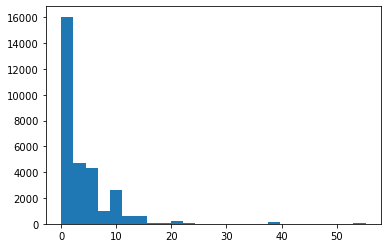

In [1330]:
plt.hist(X['workplaces_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workplaces_km'>

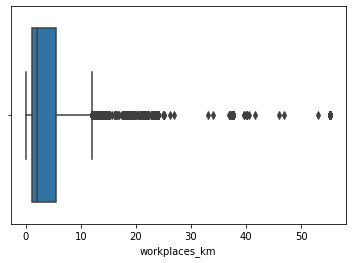

In [1331]:
sns.boxplot(X['workplaces_km'])

In [1332]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['workplaces_km']]) # обучение
X['anomaly_workplaces_km']=clf.predict(X[['workplaces_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km', 'anomaly_water_km', 'anomaly_mkad_km', 'anomaly_ttk_km', 'anomaly_sadovoe_km',
'anomaly_bulvar_ring_km', 'anomaly_kremlin_km', 'anomaly_ts_km', 'anomaly_big_market_km', 'anomaly_market_shop_km',
'anomaly_fitness_km', 'anomaly_university_km', 'anomaly_workplaces_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_ttk_km,anomaly_sadovoe_km,anomaly_bulvar_ring_km,anomaly_kremlin_km,anomaly_ts_km,anomaly_big_market_km,anomaly_market_shop_km,anomaly_fitness_km,anomaly_university_km,anomaly_workplaces_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,NaN,1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,NaN,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,NaN,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,NaN,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,-1,NaN,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,NaN,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,-1,NaN,1,1,1,1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,NaN,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,NaN,1,1,1,1,1,1,1


In [1333]:
anomaly=X.loc[X['anomaly_workplaces_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'workplaces_km'] = data['workplaces_km'].median()
print(anomaly['workplaces_km'])

20       13.996907
381       0.000000
467      13.875861
1033     12.490060
1177     12.368220
           ...    
30364    13.611344
30380    13.611344
30398    24.044008
30429    12.405811
30451    37.681524
Name: workplaces_km, Length: 1524, dtype: float64


In [1334]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1335]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1336]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3420344.338793357

In [1337]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1338]:
r2_score(Y_train, y_train_predict)

0.481442996973072

In [1339]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1340]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3474849.6680995813

In [1341]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1342]:
r2_score(Y_test, y_test_predict)

0.4969451823637385

In [1343]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([1.866e+04, 5.851e+03, 2.256e+03, 1.669e+03, 8.500e+02, 2.400e+02,
        6.600e+01, 3.440e+02, 9.400e+01, 9.000e+00, 6.700e+01, 5.300e+01,
        4.000e+01, 8.000e+01, 2.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        1.470e+02, 0.000e+00, 3.000e+01, 2.000e+00, 5.000e+00, 1.000e+00,
        1.000e+00]),
 array([ 0.        ,  1.05038172,  2.10076345,  3.15114517,  4.20152689,
         5.25190862,  6.30229034,  7.35267207,  8.40305379,  9.45343551,
        10.50381724, 11.55419896, 12.60458068, 13.65496241, 14.70534413,
        15.75572585, 16.80610758, 17.8564893 , 18.90687102, 19.95725275,
        21.00763447, 22.0580162 , 23.10839792, 24.15877964, 25.20916137,
        26.25954309]),
 <BarContainer object of 25 artists>)

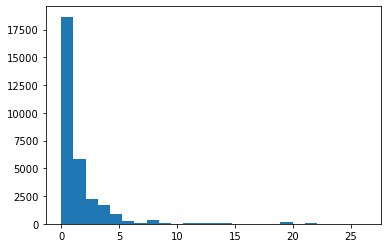

In [1344]:
plt.hist(X['shopping_centers_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='shopping_centers_km'>

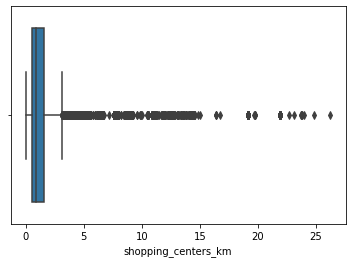

In [1345]:
sns.boxplot(X['shopping_centers_km'])

In [1346]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['shopping_centers_km']]) # обучение
X['anomaly_shopping_centers_km']=clf.predict(X[['shopping_centers_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km', 'anomaly_water_km', 'anomaly_mkad_km', 'anomaly_ttk_km', 'anomaly_sadovoe_km',
'anomaly_bulvar_ring_km', 'anomaly_kremlin_km', 'anomaly_ts_km', 'anomaly_big_market_km', 'anomaly_market_shop_km',
'anomaly_fitness_km', 'anomaly_university_km', 'anomaly_workplaces_km', 'anomaly_shopping_centers_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_sadovoe_km,anomaly_bulvar_ring_km,anomaly_kremlin_km,anomaly_ts_km,anomaly_big_market_km,anomaly_market_shop_km,anomaly_fitness_km,anomaly_university_km,anomaly_workplaces_km,anomaly_shopping_centers_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,NaN,1,1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,NaN,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,NaN,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,NaN,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,-1,NaN,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,NaN,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,-1,NaN,1,1,1,1,1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,NaN,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,NaN,1,1,1,1,1,1,1,1


In [1347]:
anomaly=X.loc[X['anomaly_shopping_centers_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'shopping_centers_km'] = data['shopping_centers_km'].median()
print(anomaly['shopping_centers_km'])

51        0.000000
60        0.000000
190       0.000000
1038      0.000000
1148      0.000000
           ...    
30353     4.152144
30364     7.937008
30380     7.937008
30398     7.605693
30451    19.142082
Name: shopping_centers_km, Length: 1523, dtype: float64


In [1348]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1349]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1350]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3461001.172539826

In [1351]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1352]:
r2_score(Y_train, y_train_predict)

0.48478169703233154

In [1353]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1354]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3307276.6435741177

In [1355]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1356]:
r2_score(Y_test, y_test_predict)

0.4851706401006036

In [1357]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([1.0883e+04, 8.3520e+03, 2.3090e+03, 1.3010e+03, 1.2370e+03,
        2.2990e+03, 2.5280e+03, 5.7200e+02, 1.9000e+01, 5.5000e+01,
        4.0300e+02, 6.6000e+01, 1.6000e+01, 2.1000e+01, 5.9000e+01,
        2.3000e+01, 5.3000e+01, 1.8000e+01, 1.6000e+01, 6.9000e+01,
        1.4400e+02, 0.0000e+00, 2.6000e+01, 1.0000e+00, 1.0000e+00]),
 array([ 0.        ,  0.75835731,  1.51671462,  2.27507193,  3.03342924,
         3.79178655,  4.55014386,  5.30850117,  6.06685848,  6.82521579,
         7.5835731 ,  8.34193041,  9.10028772,  9.85864503, 10.61700234,
        11.37535965, 12.13371696, 12.89207427, 13.65043158, 14.40878889,
        15.1671462 , 15.92550351, 16.68386082, 17.44221813, 18.20057544,
        18.95893275]),
 <BarContainer object of 25 artists>)

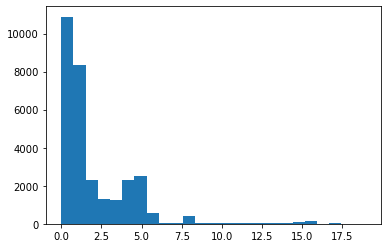

In [1358]:
plt.hist(X['office_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='office_km'>

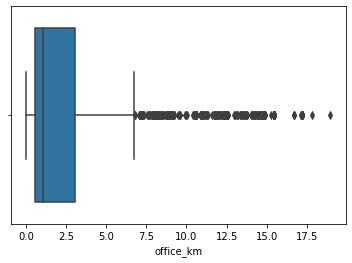

In [1359]:
sns.boxplot(X['office_km'])

In [1360]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['office_km']]) # обучение
X['anomaly_office_km']=clf.predict(X[['office_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km', 'anomaly_water_km', 'anomaly_mkad_km', 'anomaly_ttk_km', 'anomaly_sadovoe_km',
'anomaly_bulvar_ring_km', 'anomaly_kremlin_km', 'anomaly_ts_km', 'anomaly_big_market_km', 'anomaly_market_shop_km',
'anomaly_fitness_km', 'anomaly_university_km', 'anomaly_workplaces_km', 'anomaly_shopping_centers_km', 'anomaly_office_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_bulvar_ring_km,anomaly_kremlin_km,anomaly_ts_km,anomaly_big_market_km,anomaly_market_shop_km,anomaly_fitness_km,anomaly_university_km,anomaly_workplaces_km,anomaly_shopping_centers_km,anomaly_office_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,NaN,1,1,1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,NaN,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,NaN,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,NaN,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,NaN,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,NaN,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,NaN,1,1,1,1,1,1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,NaN,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,NaN,1,1,1,1,1,1,1,1,1


In [1361]:
anomaly=X.loc[X['anomaly_office_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'office_km'] = data['office_km'].median()
print(anomaly['office_km'])

90        0.018342
190       0.000000
717       0.000000
723       0.000000
740       0.000000
           ...    
30383     5.781324
30389     5.808630
30392     5.619206
30398     7.105848
30451    15.422305
Name: office_km, Length: 1522, dtype: float64


In [1362]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1363]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1364]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3404927.0208486617

In [1365]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1366]:
r2_score(Y_train, y_train_predict)

0.49236650472321075

In [1367]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1368]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3511503.9874981283

In [1369]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1370]:
r2_score(Y_test, y_test_predict)

0.4612941612030973

In [1371]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

(array([2.5887e+04, 2.5300e+03, 8.1800e+02, 2.9400e+02, 4.1400e+02,
        7.0000e+00, 1.5900e+02, 1.6600e+02, 1.0000e+00, 5.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4900e+02, 1.0000e+00,
        1.0000e+00, 5.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+01]),
 array([ 0.        ,  1.89578824,  3.79157648,  5.68736473,  7.58315297,
         9.47894121, 11.37472945, 13.27051769, 15.16630594, 17.06209418,
        18.95788242, 20.85367066, 22.7494589 , 24.64524715, 26.54103539,
        28.43682363, 30.33261187, 32.22840011, 34.12418836, 36.0199766 ,
        37.91576484, 39.81155308, 41.70734132, 43.60312957, 45.49891781,
        47.39470605]),
 <BarContainer object of 25 artists>)

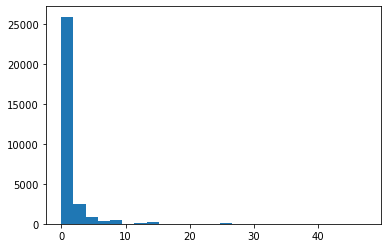

In [1372]:
plt.hist(X['preschool_km'], bins=25)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='preschool_km'>

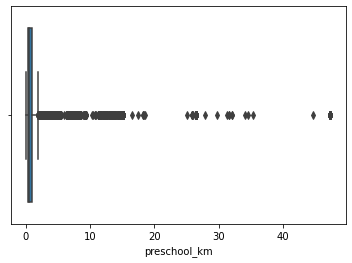

In [1373]:
sns.boxplot(X['preschool_km'])

In [1374]:
clf = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
clf.fit(X[['preschool_km']]) # обучение
X['anomaly_preschool_km']=clf.predict(X[['preschool_km']])
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km', 'anomaly_water_km', 'anomaly_mkad_km', 'anomaly_ttk_km', 'anomaly_sadovoe_km',
'anomaly_bulvar_ring_km', 'anomaly_kremlin_km', 'anomaly_ts_km', 'anomaly_big_market_km', 'anomaly_market_shop_km',
'anomaly_fitness_km', 'anomaly_university_km', 'anomaly_workplaces_km', 'anomaly_shopping_centers_km', 'anomaly_office_km', 
'anomaly_preschool_km'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_kremlin_km,anomaly_ts_km,anomaly_big_market_km,anomaly_market_shop_km,anomaly_fitness_km,anomaly_university_km,anomaly_workplaces_km,anomaly_shopping_centers_km,anomaly_office_km,anomaly_preschool_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,1,1,1,1
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,1
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,1
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,1,1
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,1,1
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,1,1,1,1,1,1,1,1
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,1,1
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,1,1,1,1,1,1


In [1375]:
anomaly=X.loc[X['anomaly_preschool_km']==-1]
anomaly_index=list(anomaly.index)
X.loc[anomaly_index, 'preschool_km'] = data['preschool_km'].median()
print(anomaly['preschool_km'])

2252      4.734775
2592     12.358465
2648     13.565500
2715      7.671322
2803      7.671322
           ...    
30353     7.872947
30364     7.671322
30380     7.671322
30398    12.444870
30451    26.499723
Name: preschool_km, Length: 1504, dtype: float64


In [1376]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1377]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1378]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3462646.976533546

In [1379]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1380]:
r2_score(Y_train, y_train_predict)

0.4850047952096965

In [1381]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1382]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3284558.8267496433

In [1383]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1384]:
r2_score(Y_test, y_test_predict)

0.48912401680112105

In [1385]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

In [1386]:
dat3 = X.copy()

In [1387]:
dat3['price_doc'] = Y

In [1388]:
dat2 = dat3[['full_sq', 'life_sq', 'price_doc']]

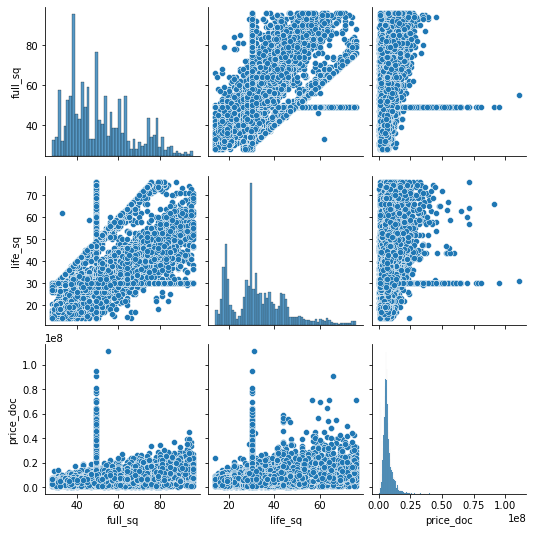

In [1389]:
sns.pairplot(dat2)

In [1390]:
dat2 = dat3[['kremlin_km', 'sadovoe_km', 'price_doc']]

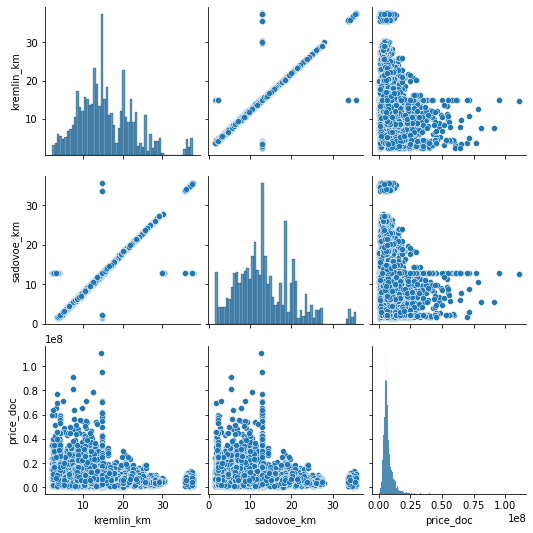

In [1391]:
sns.pairplot(dat2)

In [1392]:
X['hyperbola_kremlin_km'] = 1/X['kremlin_km']

In [1393]:
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km', 'anomaly_water_km', 'anomaly_mkad_km', 'anomaly_ttk_km', 'anomaly_sadovoe_km',
'anomaly_bulvar_ring_km', 'anomaly_kremlin_km', 'anomaly_ts_km', 'anomaly_big_market_km', 'anomaly_market_shop_km',
'anomaly_fitness_km', 'anomaly_university_km', 'anomaly_workplaces_km', 'anomaly_shopping_centers_km', 'anomaly_office_km', 
'anomaly_preschool_km', 'hyperbola_kremlin_km' ])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_ts_km,anomaly_big_market_km,anomaly_market_shop_km,anomaly_fitness_km,anomaly_university_km,anomaly_workplaces_km,anomaly_shopping_centers_km,anomaly_office_km,anomaly_preschool_km,hyperbola_kremlin_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,1,1,1,0.065980
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,1,0.114968
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,1,0.110279
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,1,0.051316
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,1,1,1,1,0.387797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,1,0.079370
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,1,1,1,1,1,1,1,0.305877
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,1,0.045650
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,1,1,1,1,1,0.073408


In [1394]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1395]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1396]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3443459.220972528

In [1397]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1398]:
r2_score(Y_train, y_train_predict)

0.4878466075260679

In [1399]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1400]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3359993.38649911

In [1401]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1402]:
r2_score(Y_test, y_test_predict)

0.4781770055416992

In [1403]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

In [1404]:
X['hyperbola_sadovoe_km'] = 1/X['sadovoe_km']

In [1405]:
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km', 'anomaly_water_km', 'anomaly_mkad_km', 'anomaly_ttk_km', 'anomaly_sadovoe_km',
'anomaly_bulvar_ring_km', 'anomaly_kremlin_km', 'anomaly_ts_km', 'anomaly_big_market_km', 'anomaly_market_shop_km',
'anomaly_fitness_km', 'anomaly_university_km', 'anomaly_workplaces_km', 'anomaly_shopping_centers_km', 'anomaly_office_km', 
'anomaly_preschool_km', 'hyperbola_kremlin_km', 'hyperbola_sadovoe_km' ])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_big_market_km,anomaly_market_shop_km,anomaly_fitness_km,anomaly_university_km,anomaly_workplaces_km,anomaly_shopping_centers_km,anomaly_office_km,anomaly_preschool_km,hyperbola_kremlin_km,hyperbola_sadovoe_km
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,1,1,0.065980,0.076332
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,1,0.114968,0.155175
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,1,0.110279,0.143608
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,1,0.051316,0.057283
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,1,1,1,0.387797,0.078439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,1,0.079370,0.094843
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,1,1,1,1,1,1,0.305877,0.078439
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,1,0.045650,0.050330
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,1,1,1,1,0.073408,0.085092


In [1406]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1407]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1408]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3438379.9672981445

In [1409]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1410]:
r2_score(Y_train, y_train_predict)

0.4930839290758292

In [1411]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1412]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3365681.3009141576

In [1413]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1414]:
r2_score(Y_test, y_test_predict)

0.45938307139515056

In [1415]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

In [1416]:
dat2 = dat3[['green_zone_part', 'indust_part', 'price_doc']]

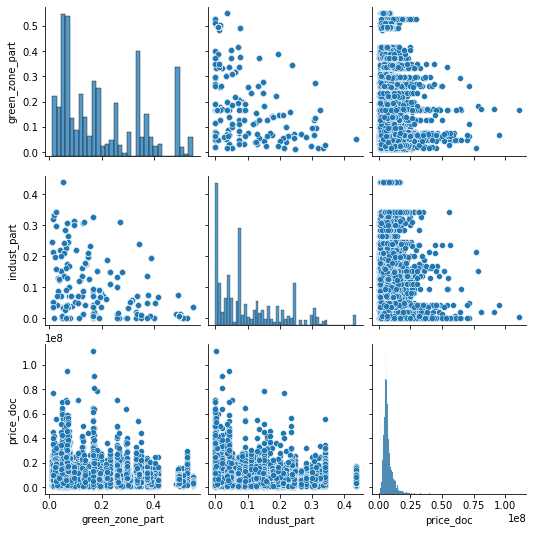

In [1417]:
sns.pairplot(dat2)

In [1418]:
dat2 = dat3[['floor', 'max_floor', 'price_doc']]

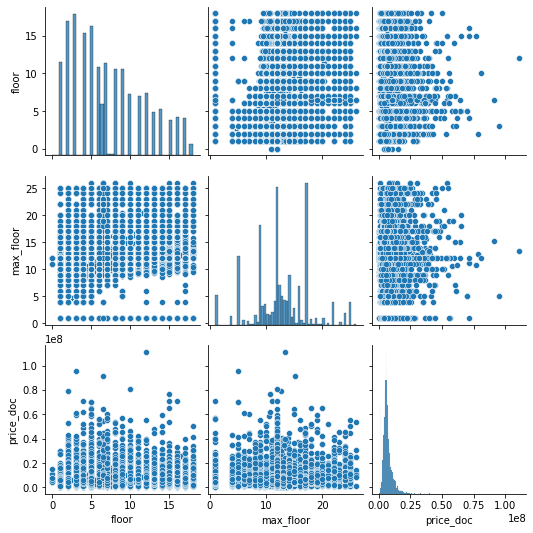

In [1419]:
sns.pairplot(dat2)

In [1420]:
dat2 = dat3[['material', 'price_doc']]

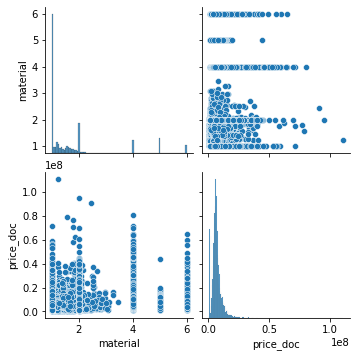

In [1421]:
sns.pairplot(dat2)

In [1422]:
dat2 = dat3[['num_room', 'price_doc']]

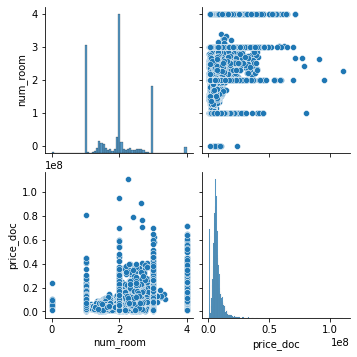

In [1423]:
sns.pairplot(dat2)

In [1424]:
X['root_num_room'] = X['num_room']**(0.5)

In [1425]:
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km', 'anomaly_water_km', 'anomaly_mkad_km', 'anomaly_ttk_km', 'anomaly_sadovoe_km',
'anomaly_bulvar_ring_km', 'anomaly_kremlin_km', 'anomaly_ts_km', 'anomaly_big_market_km', 'anomaly_market_shop_km',
'anomaly_fitness_km', 'anomaly_university_km', 'anomaly_workplaces_km', 'anomaly_shopping_centers_km', 'anomaly_office_km', 
'anomaly_preschool_km', 'hyperbola_kremlin_km', 'hyperbola_sadovoe_km', 'root_num_room'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_market_shop_km,anomaly_fitness_km,anomaly_university_km,anomaly_workplaces_km,anomaly_shopping_centers_km,anomaly_office_km,anomaly_preschool_km,hyperbola_kremlin_km,hyperbola_sadovoe_km,root_num_room
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,1,0.065980,0.076332,1.386229
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,1,0.114968,0.155175,1.218265
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,1,0.110279,0.143608,1.388623
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,1,0.051316,0.057283,1.638027
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,1,1,0.387797,0.078439,1.648229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,1,0.079370,0.094843,1.414214
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,1,1,1,1,1,0.305877,0.078439,2.000000
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,1,0.045650,0.050330,1.000000
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,1,1,1,0.073408,0.085092,1.414214


In [1426]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1427]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1428]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3449804.5007254025

In [1429]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1430]:
r2_score(Y_train, y_train_predict)

0.4917438272956791

In [1431]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1432]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3277631.069430096

In [1433]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1434]:
r2_score(Y_test, y_test_predict)

0.47763633067537425

In [1435]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

In [1436]:
dat2 = dat3[['state', 'price_doc']]

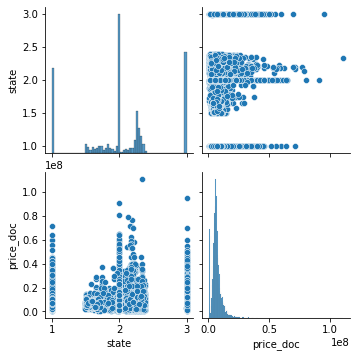

In [1437]:
sns.pairplot(dat2)

In [1438]:
dat2 = dat3[['kitch_sq', 'price_doc']]

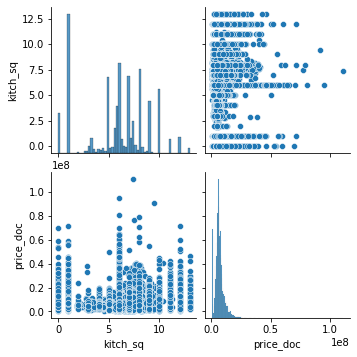

In [1439]:
sns.pairplot(dat2)

In [1440]:
dat2 = data[['office_raion', 'ID_metro', 'metro_min_walk', 'price_doc']]

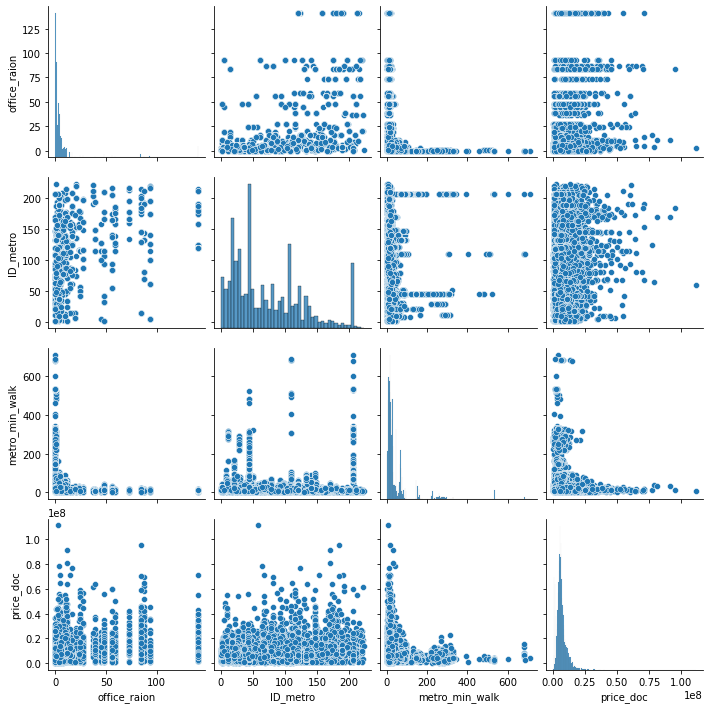

In [1441]:
sns.pairplot(dat2)

In [1442]:
X['hyperbola_metro_min_walk'] = 1/(X['metro_min_walk']+1)

In [1443]:
X.reindex(columns=['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'anomaly_full_sq', 'isna_life_sq', 'anomaly_life_sq', 'isna_floor', 'anomaly_floor',
'isna_max_floor', 'anomaly_max_floor', 'isna_material', 'isna_build_year', 'anomaly_build_year', 'isna_num_room',
'anomaly_num_room', 'isna_kitch_sq', 'anomaly_kitch_sq', 'isna_state', 'anomaly_state', 'isna_hospital_beds_raion',
'anomaly_hospital_beds_raion', 'anomaly_area_m', 'anomaly_raion_popul', 'anomaly_green_zone_part', 'anomaly_indust_part',
'anomaly_preschool_education_centers_raion', 'anomaly_school_education_centers_raion', 'anomaly_healthcare_centers_raion', 
'anomaly_sport_objects_raion', 'anomaly_additional_education_raion', 'anomaly_shopping_centers_raion', 'anomaly_office_raion',
'anomaly_ID_metro', 'anomaly_metro_min_walk', 'anomaly_kindergarten_km', 'anomaly_school_km', 'anomaly_park_km',
'anomaly_green_zone_km', 'anomaly_industrial_km', 'anomaly_water_km', 'anomaly_mkad_km', 'anomaly_ttk_km', 'anomaly_sadovoe_km',
'anomaly_bulvar_ring_km', 'anomaly_kremlin_km', 'anomaly_ts_km', 'anomaly_big_market_km', 'anomaly_market_shop_km',
'anomaly_fitness_km', 'anomaly_university_km', 'anomaly_workplaces_km', 'anomaly_shopping_centers_km', 'anomaly_office_km', 
'anomaly_preschool_km', 'hyperbola_kremlin_km', 'hyperbola_sadovoe_km',  'root_num_room', 'hyperbola_metro_min_walk'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,anomaly_fitness_km,anomaly_university_km,anomaly_workplaces_km,anomaly_shopping_centers_km,anomaly_office_km,anomaly_preschool_km,hyperbola_kremlin_km,hyperbola_sadovoe_km,root_num_room,hyperbola_metro_min_walk
0,43,27.000000,4.0,11.272639,1.179172,1972.404300,1.921629,5.829721,2.251378,6.407578e+06,...,1,1,1,1,1,1,0.065980,0.076332,1.386229,0.068610
1,34,19.000000,3.0,11.972072,1.690758,1970.663882,1.484169,6.914857,2.240098,9.589337e+06,...,1,1,1,1,1,1,0.114968,0.155175,1.218265,0.116001
2,43,29.000000,2.0,9.256280,1.659613,1974.457178,1.928273,5.844584,2.272796,4.808270e+06,...,1,1,1,1,1,1,0.110279,0.143608,1.388623,0.054491
3,89,50.000000,9.0,14.280019,1.361529,1958.836730,2.683132,8.392907,2.000000,1.258354e+07,...,1,1,1,1,1,1,0.051316,0.057283,1.638027,0.079582
4,77,30.000000,4.0,10.282458,1.647234,1972.227145,2.716660,8.110109,2.301091,8.398461e+06,...,1,1,1,1,1,1,0.387797,0.078439,1.648229,0.107918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,1.005305e+07,...,1,1,1,1,1,1,0.079370,0.094843,1.414214,0.109193
30467,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,7.307411e+06,...,1,1,1,1,1,1,0.305877,0.078439,2.000000,0.096389
30468,45,31.747391,10.0,20.000000,1.000000,1823.500546,1.000000,1.000000,1.000000,2.553630e+07,...,1,1,1,1,1,1,0.045650,0.050330,1.000000,0.046154
30469,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,6.050065e+06,...,1,1,1,1,1,1,0.073408,0.085092,1.414214,0.039112


In [1444]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [1445]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [1446]:
y_train_predict = lin_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, y_train_predict))

3448259.2630806384

In [1447]:
costs_mse_train.append(np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [1448]:
r2_score(Y_train, y_train_predict)

0.48756215594975383

In [1449]:
costs_r2_train.append(r2_score(Y_train, y_train_predict))

In [1450]:
y_test_predict = lin_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test, y_test_predict))

3283777.844848929

In [1451]:
costs_mse_test.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [1452]:
r2_score(Y_test, y_test_predict)

0.496762483733424

In [1453]:
costs_r2_test.append(r2_score(Y_test, y_test_predict))

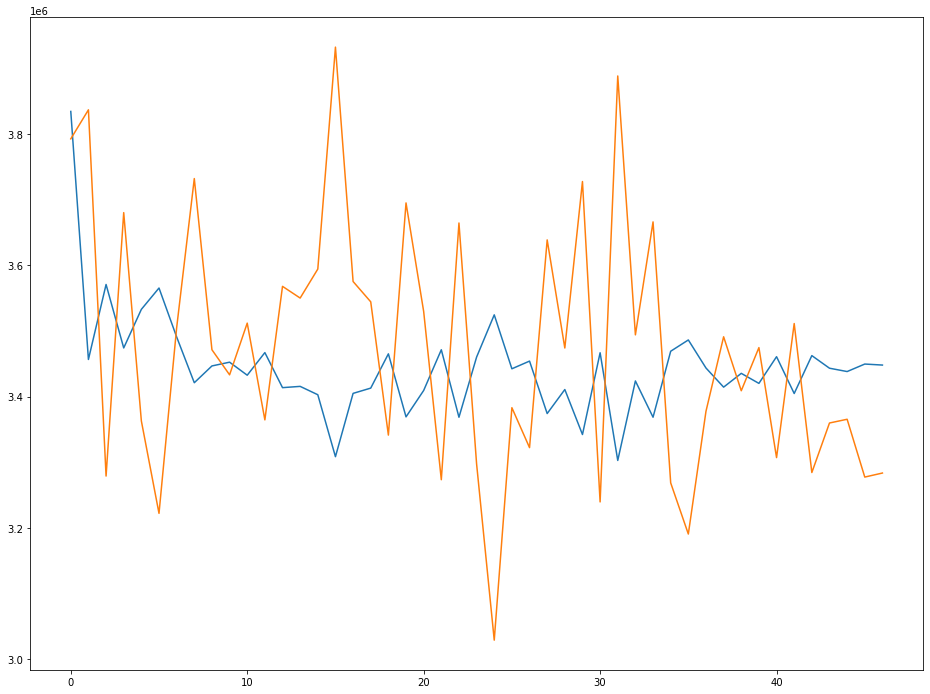

In [1454]:
plt.figure(figsize=(16,12))
plt.plot(costs_mse_train)
plt.plot(costs_mse_test)
plt.show()

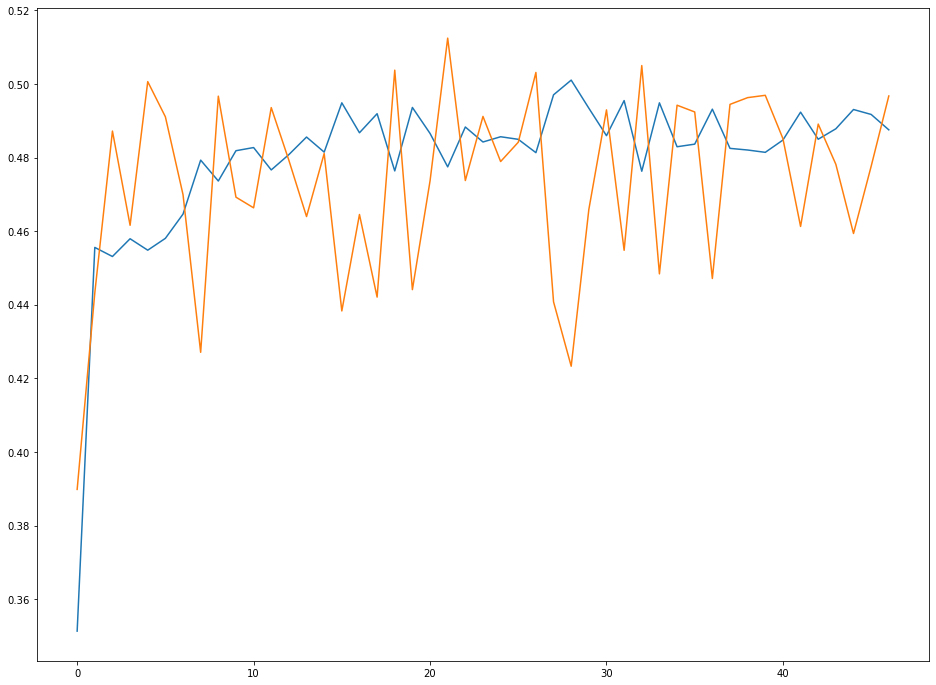

In [1455]:
plt.figure(figsize=(16,12))
plt.plot(costs_r2_train)
plt.plot(costs_r2_test)
plt.show()